# Ford GoBike 
## by Omar Bougacha

## Preliminary Wrangling

For this project, I choose to work with Ford GoBike Data. This dataset is about the Bay Wheels project that consists in giving people the opportunity to rent bikes. The data describes the information of the rides done with the available bikes. 

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

If we look at the [website](https://s3.amazonaws.com/baywheels-data/index.html) of the data we can see that the gave the datasets of several years:
- we have the dataset of 2017 but the data here is only available from late june and on. 
- The dataset of 2018 but this dataset is divived each month data is in a file. 
- The dataset of 2019 is also divided into monthly files. 
- And the dataset of 2020 which obviously is not complete. 

For this project, I propose to study the behaviour of bike renting among other ideas over the whole year. Therefore, I only focus my work on the dataset of 2018. Then, I compare the insights found with those of 2019. The parts of 2017 and 2020 are going to be ignored. 

Throughout this project, I try to summarize the skills learned in the wrangling lessons and apply them to the dataset before moving to the visualization part. 

### Data Gathering

The first step of the wrangling process and the analysis process in general is the data gathering. In this application the data is available online in a compressed file format (zip) files. Now each zip file contain the csv file of the respective dataset (i.e. month). We can surely download each file **manually**, decompress it **manually**, and then merge the monthly data to obtain a yearly dataset. This would probably take along time and won't help readers to reproduce the work. Therefore I choose to do the work **programmatically**. 

For this I use the **requests** and **zipfile** libraries. I also use the **os** library but just to organise things. The **timeit** library is used to compute the time spent during some operations. 

Let's start by importing these libraries:

In [2]:
import requests
import zipfile
import os
from timeit import default_timer as timer

Since we have a large number of links and files, it would be wise to automatise the operation. Therefore, I start by defining a list containing the name I chose for the file and the download link.

In [3]:
data_zip_urls = [
    #('file_name', 'url')
    ('Jan_2018', 'https://s3.amazonaws.com/baywheels-data/201801-fordgobike-tripdata.csv.zip'),
    ('Fev_2018', 'https://s3.amazonaws.com/baywheels-data/201802-fordgobike-tripdata.csv.zip'), 
    ('Mar_2018', 'https://s3.amazonaws.com/baywheels-data/201803-fordgobike-tripdata.csv.zip'),
    ('Apr_2018', 'https://s3.amazonaws.com/baywheels-data/201804-fordgobike-tripdata.csv.zip'),
    ('May_2018', 'https://s3.amazonaws.com/baywheels-data/201805-fordgobike-tripdata.csv.zip'),
    ('Jun_2018', 'https://s3.amazonaws.com/baywheels-data/201806-fordgobike-tripdata.csv.zip'),
    ('Jul_2018', 'https://s3.amazonaws.com/baywheels-data/201807-fordgobike-tripdata.csv.zip'),
    ('Aug_2018', 'https://s3.amazonaws.com/baywheels-data/201808-fordgobike-tripdata.csv.zip'),
    ('Sep_2018', 'https://s3.amazonaws.com/baywheels-data/201809-fordgobike-tripdata.csv.zip'),
    ('Oct_2018', 'https://s3.amazonaws.com/baywheels-data/201810-fordgobike-tripdata.csv.zip'),
    ('Nov_2018', 'https://s3.amazonaws.com/baywheels-data/201811-fordgobike-tripdata.csv.zip'),
    ('Dec_2018', 'https://s3.amazonaws.com/baywheels-data/201812-fordgobike-tripdata.csv.zip'),
    ('Jan_2019', 'https://s3.amazonaws.com/baywheels-data/201901-fordgobike-tripdata.csv.zip'),
    ('Fev_2019', 'https://s3.amazonaws.com/baywheels-data/201902-fordgobike-tripdata.csv.zip'), 
    ('Mar_2019', 'https://s3.amazonaws.com/baywheels-data/201903-fordgobike-tripdata.csv.zip'),
    ('Apr_2019', 'https://s3.amazonaws.com/baywheels-data/201904-fordgobike-tripdata.csv.zip'),
    ('May_2019', 'https://s3.amazonaws.com/baywheels-data/201905-baywheels-tripdata.csv.zip'),
    ('Jun_2019', 'https://s3.amazonaws.com/baywheels-data/201906-baywheels-tripdata.csv.zip'),
    ('Jul_2019', 'https://s3.amazonaws.com/baywheels-data/201907-baywheels-tripdata.csv.zip'),
    ('Aug_2019', 'https://s3.amazonaws.com/baywheels-data/201908-baywheels-tripdata.csv.zip'),
    ('Sep_2019', 'https://s3.amazonaws.com/baywheels-data/201909-baywheels-tripdata.csv.zip'),
    ('Oct_2019', 'https://s3.amazonaws.com/baywheels-data/201910-baywheels-tripdata.csv.zip'),
    ('Nov_2019', 'https://s3.amazonaws.com/baywheels-data/201911-baywheels-tripdata.csv.zip'),
    ('Dec_2019', 'https://s3.amazonaws.com/baywheels-data/201912-baywheels-tripdata.csv.zip')
]

Now, let's define a function that will download the given link and save the file. 

In [4]:
def download_url(file_name, url, path='', chunk_size=128):
    r = requests.get(url, stream=True)
    with open(path+'/'+file_name+'.zip', 'wb') as fd:
        for chunk in r.iter_content(chunk_size=chunk_size):
            fd.write(chunk)

To keep things well organized, I propose to define two sub-directories one where we will keep the zip files and the other one for the csv files.

In [5]:
CD = os.getcwd()
zip_file_dir = CD + '/zip_data_files'
if not os.path.exists(zip_file_dir) :
    os.mkdir(zip_file_dir) 
csv_file_dir = CD + '/csv_data_files'
if not os.path.exists(csv_file_dir):
    os.mkdir(csv_file_dir)

Now let's download the zip files save them in the zip_file_dir and extract them and save the csv file in the csv_file_dir. I use a dictionary to save the path for each file to facilitate the access later. 

In [7]:
start = timer()
data_files={}
for url in data_zip_urls:
    download_url(*url,zip_file_dir)
    zip_file = zipfile.ZipFile(zip_file_dir+'/'+url[0]+'.zip')
    for names in zip_file.namelist():
        if '/' not in names:
            print(names)
            data_files[url[0]] = csv_file_dir+'/'+names
            zip_file.extract(names,csv_file_dir)
end = timer()
print('duration', end - start)

201801-fordgobike-tripdata.csv
201802-fordgobike-tripdata.csv
201803-fordgobike-tripdata.csv
201804-fordgobike-tripdata.csv
201805-fordgobike-tripdata.csv
201806-fordgobike-tripdata.csv
201807-fordgobike-tripdata.csv
201808-fordgobike-tripdata.csv
201809-fordgobike-tripdata.csv
201810-fordgobike-tripdata.csv
201811-fordgobike-tripdata.csv
201812-fordgobike-tripdata.csv
201901-fordgobike-tripdata.csv
201902-fordgobike-tripdata.csv
201903-fordgobike-tripdata.csv
201904-fordgobike-tripdata.csv
201905-baywheels-tripdata.csv
201906-baywheels-tripdata.csv
201907-baywheels-tripdata.csv
201908-baywheels-tripdata.csv
201909-baywheels-tripdata.csv
201910-baywheels-tripdata.csv
201911-baywheels-tripdata.csv
201912-baywheels-tripdata.csv
duration 79.65447292299996


Well as we can see it only took us 79.65 seconds to download and unzip the files and organize them in the good directories. Well the duration depends also of the internet speed. However, it's more comfortable, reproducible, and rapid to do this the programmatical way. 

We also know have a dictionnary that contains the path for each file "data_files". Now the next step is to regroup the files per year. So we can have a single csv file per year. These files we will keep at the main directory because we will use them alot. 

In [8]:
def regroup(year):
    df = pd.DataFrame()
    for key in data_files.keys():
        if str(year) in key:
            df = df.append(pd.read_csv(data_files[key]), ignore_index=True)
    df.to_csv(str(year)+'_dataset.csv', index=False)

Let's apply the function to 2018 and 2019.

In [9]:
regroup(2018)

In [10]:
regroup(2019)

/home/omar/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3249: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):
/home/omar/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:7123: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,
/home/omar/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3249: DtypeWarning: Columns (13,14) have mixed types. Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):
/home/omar/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3249: DtypeWarning: Columns (13) have mixed types. Specify dtype option on imp

We can see there are some warning about the 2019 dataset. We will check this more closely when we perform the assessment. 

### 2018_dataset Data Assessment:

Let's load the data and start investigating it.

In [11]:
gobike_2018_df = pd.read_csv('2018_dataset.csv')
gobike_2018_df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip
0,75284,2018-01-31 22:52:35.2390,2018-02-01 19:47:19.8240,120.0,Mission Dolores Park,37.761420,-122.426435,285.0,Webster St at O'Farrell St,37.783521,-122.431158,2765,Subscriber,No
1,85422,2018-01-31 16:13:34.3510,2018-02-01 15:57:17.3100,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,2815,Customer,No
2,71576,2018-01-31 14:23:55.8890,2018-02-01 10:16:52.1160,304.0,Jackson St at 5th St,37.348759,-121.894798,296.0,5th St at Virginia St,37.325998,-121.877120,3039,Customer,No
3,61076,2018-01-31 14:53:23.5620,2018-02-01 07:51:20.5000,75.0,Market St at Franklin St,37.773793,-122.421239,47.0,4th St at Harrison St,37.780955,-122.399749,321,Customer,No
4,39966,2018-01-31 19:52:24.6670,2018-02-01 06:58:31.0530,74.0,Laguna St at Hayes St,37.776435,-122.426244,19.0,Post St at Kearny St,37.788975,-122.403452,617,Subscriber,No


**Visually** we can already detect three problems with the dataset two obvious quality problems:
- the start_station_id and end_station_id should be integers not floats.


we have a tidiness issue, the tables here present information about the stations and the bike rides. **Two observational units in the same table** 

Let's continue with the assessment **programmatically**.

In [12]:
gobike_2018_df.isnull().sum()

duration_sec                   0
start_time                     0
end_time                       0
start_station_id           11771
start_station_name         11771
start_station_latitude         0
start_station_longitude        0
end_station_id             11771
end_station_name           11771
end_station_latitude           0
end_station_longitude          0
bike_id                        0
user_type                      0
bike_share_for_all_trip        0
dtype: int64

We can see that we have 4 data quality problems related to the data completness: 
- 11771 missing values for each of the start and end stations' ids and names. 

Let's take a closer look to have an idea about this problem and maybe propose a solution. 

In [13]:
gobike_2018_df[gobike_2018_df['start_station_id'].isnull()].head(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip
623364,5572,2018-06-30 20:58:31.8550,2018-06-30 22:31:24.5930,NaN,NaN,37.40,-121.94,NaN,NaN,37.40,-121.94,4202,Customer,No
623376,573,2018-06-30 22:12:27.5110,2018-06-30 22:22:01.1740,NaN,NaN,37.40,-121.94,NaN,NaN,37.40,-121.93,4095,Subscriber,Yes
623393,850,2018-06-30 22:01:25.5850,2018-06-30 22:15:36.1510,NaN,NaN,37.41,-121.94,NaN,NaN,37.41,-121.95,4122,Customer,No
623429,562,2018-06-30 21:52:05.1180,2018-06-30 22:01:27.4400,NaN,NaN,37.41,-121.94,NaN,NaN,37.42,-121.94,4184,Subscriber,No
623456,819,2018-06-30 21:37:34.5060,2018-06-30 21:51:13.7290,NaN,NaN,37.41,-121.94,NaN,NaN,37.41,-121.96,4137,Customer,No


We can see that the values are missing from the start and end station at the same time. We still have the latitude and longitude of the start and end point. Let's see if we can use that to find the actual station. 

In [14]:
gobike_2018_df[gobike_2018_df['start_station_latitude']==37.40].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4395 entries, 623364 to 1860854
Data columns (total 14 columns):
duration_sec               4395 non-null int64
start_time                 4395 non-null object
end_time                   4395 non-null object
start_station_id           0 non-null float64
start_station_name         0 non-null object
start_station_latitude     4395 non-null float64
start_station_longitude    4395 non-null float64
end_station_id             0 non-null float64
end_station_name           0 non-null object
end_station_latitude       4395 non-null float64
end_station_longitude      4395 non-null float64
bike_id                    4395 non-null int64
user_type                  4395 non-null object
bike_share_for_all_trip    4395 non-null object
dtypes: float64(6), int64(2), object(6)
memory usage: 515.0+ KB


So there are 4395 entries in which the latitude of the start station is 37.40 and all these records present missing values for both start and end stations' ids and names. The obvious solution for these missing values is to drop them. I think we have enough records to elimate those with missing data. 

In [15]:
11771/gobike_2018_df.shape[0]

0.006315859509014493

These values only present 0.6% of all the records. So I propose to drop them. 

Let's continue with our assessment:

In [16]:
gobike_2018_df.dtypes

duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
bike_share_for_all_trip     object
dtype: object

Well we can see that we have several quality issues: 
- The types for start_time and end_time should be of datetime types.
- Quick reminder of the station ids should be integers 

Let's see how many station has the city of San Francisco.

In [17]:
gobike_2018_df['start_station_id'].nunique()

331

Are there more end stations? 

In [18]:
gobike_2018_df['end_station_id'].nunique()

331

Seems like no issues are visible. We will look into this deeper when we extract the station information into another table.

### 2018_dataset Data Cleaning:

In [19]:
gobike_2018_cln = gobike_2018_df.copy()

#### Missing data problem: 

##### Define: 
- we drop the rows with the missing values. 

##### Code: 

In [20]:
gobike_2018_cln = gobike_2018_cln.dropna().reset_index(drop=True)

##### Test:

In [21]:
gobike_2018_cln.isnull().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
bike_share_for_all_trip    0
dtype: int64

In [22]:
gobike_2018_cln.shape[0], gobike_2018_cln.shape[0]/gobike_2018_df.shape[0]

(1851950, 0.9936841404909855)

Now we fixed the missing values problem and as you can see we still have 99.36% of the data entries in our dataset. There is no problem with dropping the missing values.

#### Type accuracy problem:
- The start and end times should be transformed into datetime types
- The start and end stations' ids should be of type integer

##### Define: 
- Change the types of start_time and end_time to datetime using pandas.to_datetime function
- Change the types of start_station_id and end_station_id to integer using the astype function

##### Code:

In [23]:
gobike_2018_cln['start_time'] = pd.to_datetime(gobike_2018_cln['start_time'])
gobike_2018_cln['end_time'] = pd.to_datetime(gobike_2018_cln['end_time'])
gobike_2018_cln['start_station_id'] = gobike_2018_cln['start_station_id'].astype('int64')
gobike_2018_cln['end_station_id'] = gobike_2018_cln['end_station_id'].astype('int64')

##### Test: 

In [24]:
gobike_2018_cln.dtypes

duration_sec                        int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id                    int64
start_station_name                 object
start_station_latitude            float64
start_station_longitude           float64
end_station_id                      int64
end_station_name                   object
end_station_latitude              float64
end_station_longitude             float64
bike_id                             int64
user_type                          object
bike_share_for_all_trip            object
dtype: object

Now we are left with the tidiness issue. Let's fix it.
#### Tidiness issue:

##### Define: 
- Create a new dataframe that contains the stations information. 


##### Code: 

In [25]:
stations_2018 = pd.DataFrame()
stations_2018['station_id'] = gobike_2018_cln['start_station_id']
stations_2018['station_name'] = gobike_2018_cln['start_station_name']
stations_2018['station_latitude'] = gobike_2018_cln['start_station_latitude']
stations_2018['station_longitude'] = gobike_2018_cln['start_station_longitude']
stations_2018.head(5)

,station_id,station_name,station_latitude,station_longitude
0,120,Mission Dolores Park,37.761420,-122.426435
1,15,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203
2,304,Jackson St at 5th St,37.348759,-121.894798
3,75,Market St at Franklin St,37.773793,-122.421239
4,74,Laguna St at Hayes St,37.776435,-122.426244


Let's add to it the end stations then eliminate the duplicated lines.

In [26]:
end_2018 = pd.DataFrame()
end_2018['station_id'] = gobike_2018_cln['end_station_id']
end_2018['station_name'] = gobike_2018_cln['end_station_name']
end_2018['station_latitude'] = gobike_2018_cln['end_station_latitude']
end_2018['station_longitude'] = gobike_2018_cln['end_station_longitude']
end_2018.head(5)

,station_id,station_name,station_latitude,station_longitude
0,285,Webster St at O'Farrell St,37.783521,-122.431158
1,15,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203
2,296,5th St at Virginia St,37.325998,-121.877120
3,47,4th St at Harrison St,37.780955,-122.399749
4,19,Post St at Kearny St,37.788975,-122.403452


In [27]:
stations_2018 = stations_2018.append(end_2018, ignore_index=True)
stations_2018.shape

(3703900, 4)

In [28]:
dup_idx = stations_2018[stations_2018.duplicated()].index.tolist()

In [29]:
stations_2018 = stations_2018.drop(dup_idx).reset_index(drop=True)
stations_2018.head(5)

,station_id,station_name,station_latitude,station_longitude
0,120,Mission Dolores Park,37.761420,-122.426435
1,15,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203
2,304,Jackson St at 5th St,37.348759,-121.894798
3,75,Market St at Franklin St,37.773793,-122.421239
4,74,Laguna St at Hayes St,37.776435,-122.426244


##### Test: 

Let's see how many rows left in the station_id (it should be 331 since that's the number of stations obtained previously).

In [30]:
stations_2018.shape[0]

358

Well this is a surprise. Now let's check how many different Ids there is.

In [31]:
stations_2018['station_id'].nunique()

331

Now this can be explained. The data is collected over a duration of a year. And during the year sometimes there are some construction work done next to bike station. To keep the users safe, some temporarly stations are created just few meters away from the original ones. Keeping the same id and almost the same location only the name changes. 

For this work, we simply drop the stations with redundant station id.

In [32]:
dup_idx = stations_2018[stations_2018['station_id'].duplicated()].index.tolist()

In [33]:
stations_2018 = stations_2018.drop(dup_idx).reset_index(drop=True)
stations_2018.head(5)

,station_id,station_name,station_latitude,station_longitude
0,120,Mission Dolores Park,37.761420,-122.426435
1,15,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203
2,304,Jackson St at 5th St,37.348759,-121.894798
3,75,Market St at Franklin St,37.773793,-122.421239
4,74,Laguna St at Hayes St,37.776435,-122.426244


In [34]:
stations_2018.shape[0]

331

##### Define:

- Tidy the gobike_2018 dataframe by droping the extra columns. 

##### Code:


In [35]:
gobike_2018_cln.drop(['start_station_name', 'start_station_latitude', 'start_station_longitude',
                    'end_station_name', 'end_station_latitude', 'end_station_longitude',], axis=1, inplace = True)

##### Test:

In [36]:
gobike_2018_cln.head()

,duration_sec,start_time,end_time,start_station_id,end_station_id,bike_id,user_type,bike_share_for_all_trip
0,75284,2018-01-31 22:52:35.239,2018-02-01 19:47:19.824,120,285,2765,Subscriber,No
1,85422,2018-01-31 16:13:34.351,2018-02-01 15:57:17.310,15,15,2815,Customer,No
2,71576,2018-01-31 14:23:55.889,2018-02-01 10:16:52.116,304,296,3039,Customer,No
3,61076,2018-01-31 14:53:23.562,2018-02-01 07:51:20.500,75,47,321,Customer,No
4,39966,2018-01-31 19:52:24.667,2018-02-01 06:58:31.053,74,19,617,Subscriber,No


**Summary:** We have now obtained a dataframe that is clean and tidy for the bike rides. The same goes for the stations information. Let's save these dataframes into csv files.

In [37]:
gobike_2018_cln.to_csv('gobike_clean_2018.csv', index = False)

In [38]:
stations_2018.to_csv('stations_info_2018.csv', index = False)

Now let's move to the do the same for the 2019 dataset. However, before we go. You can notice that the dataframes are quite large and require a lot of memory. To avoid having memory overflow, I propose to delete the variables we won't use anymore. These variables are data_files, end_2018, and gobike_2018_df. 

In [39]:
del data_files
del end_2018
del gobike_2018_df

### 2019_dataset Data Assessment:

Let's load the data and start investigating it.

In [40]:
gobike_2019_df = pd.read_csv('2019_dataset.csv')
gobike_2019_df.head(5)

/home/omar/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (1,8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,bike_id,bike_share_for_all_trip,duration_sec,end_station_id,end_station_latitude,end_station_longitude,end_station_name,end_time,rental_access_method,start_station_id,start_station_latitude,start_station_longitude,start_station_name,start_time,user_type
0,4861,No,80825,196.0,37.808894,-122.256460,Grand Ave at Perkins St,2019-02-01 16:24:49.8640,NaN,229.0,37.775745,-122.213037,Foothill Blvd at 42nd Ave,2019-01-31 17:57:44.6130,Subscriber
1,5506,No,65900,134.0,37.752428,-122.420628,Valencia St at 24th St,2019-02-01 15:16:54.1730,NaN,4.0,37.785881,-122.408915,Cyril Magnin St at Ellis St,2019-01-31 20:58:33.8860,Subscriber
2,2717,No,62633,157.0,37.846784,-122.291376,65th St at Hollis St,2019-02-01 11:30:46.5300,NaN,245.0,37.870139,-122.268422,Downtown Berkeley BART,2019-01-31 18:06:52.9240,Customer
3,4557,No,44680,53.0,37.775946,-122.437777,Grove St at Divisadero,2019-02-01 08:10:50.3180,NaN,85.0,37.770083,-122.429156,Church St at Duboce Ave,2019-01-31 19:46:09.7190,Customer
4,2100,No,60709,28.0,37.787168,-122.388098,The Embarcadero at Bryant St,2019-02-01 07:10:51.0650,NaN,16.0,37.794130,-122.394430,Steuart St at Market St,2019-01-31 14:19:01.5410,Customer


In [41]:
gobike_2019_df.shape

(2506983, 15)

**Visually** we can already detect three problems with the dataset three obvious quality problems:
- the start_station_id and end_station_id should be integers not floats.
- We have missing data for the rental_access_method

Actually, this feature is new. The data from 2018 did not present this feature. 

we have the same tidiness issue as previously; the tables here present information about the stations and the bike rides. **Two observational units in the same table** 

Let's continue with the assessment **programmatically**.

In [42]:
gobike_2019_df.isnull().sum()

bike_id                          0
bike_share_for_all_trip     243259
duration_sec                     0
end_station_id               82902
end_station_latitude             0
end_station_longitude            0
end_station_name             82350
end_time                         0
rental_access_method       2386145
start_station_id             80734
start_station_latitude           0
start_station_longitude          0
start_station_name           80133
start_time                       0
user_type                        0
dtype: int64

As for missing values, we have some similar problems as before but obviously these ones are more complicated:
- 243259 missing values for the bike share feature,
- 82902 for the end_station_id,
- 82350 for the end_station_name,
- 80734 for the start_station_id,
- 80133 for the start_sation_name, and
- 2 386 145 for the rental_access_method


It seems like treating these missing values will require more efforts in dealing with them. 

In [43]:
gobike_2019_df.dtypes

bike_id                      int64
bike_share_for_all_trip     object
duration_sec                 int64
end_station_id             float64
end_station_latitude       float64
end_station_longitude      float64
end_station_name            object
end_time                    object
rental_access_method        object
start_station_id           float64
start_station_latitude     float64
start_station_longitude    float64
start_station_name          object
start_time                  object
user_type                   object
dtype: object

As we suspected, we need to change the types of: 
- end and start stations' ids.
- the end and start times.

### 2019_dataset Data Cleaning:

In [44]:
gobike_2019_cln = gobike_2019_df.copy()

#### Missing data problem: 

- Concerning the rental_access_method feature it contains almost 95% missing values. Therefore, the analysis of this feature will most likely not produce significance. Moreover, this feature was not present in the 2018 dataset. So, I propose to drop it.


##### Define: 
- we drop the rows with the missing values. 

##### Code: 

In [45]:
gobike_2019_cln.drop(['rental_access_method'], axis=1, inplace=True)

##### Test:

In [46]:
gobike_2019_cln.head(5)

,bike_id,bike_share_for_all_trip,duration_sec,end_station_id,end_station_latitude,end_station_longitude,end_station_name,end_time,start_station_id,start_station_latitude,start_station_longitude,start_station_name,start_time,user_type
0,4861,No,80825,196.0,37.808894,-122.256460,Grand Ave at Perkins St,2019-02-01 16:24:49.8640,229.0,37.775745,-122.213037,Foothill Blvd at 42nd Ave,2019-01-31 17:57:44.6130,Subscriber
1,5506,No,65900,134.0,37.752428,-122.420628,Valencia St at 24th St,2019-02-01 15:16:54.1730,4.0,37.785881,-122.408915,Cyril Magnin St at Ellis St,2019-01-31 20:58:33.8860,Subscriber
2,2717,No,62633,157.0,37.846784,-122.291376,65th St at Hollis St,2019-02-01 11:30:46.5300,245.0,37.870139,-122.268422,Downtown Berkeley BART,2019-01-31 18:06:52.9240,Customer
3,4557,No,44680,53.0,37.775946,-122.437777,Grove St at Divisadero,2019-02-01 08:10:50.3180,85.0,37.770083,-122.429156,Church St at Duboce Ave,2019-01-31 19:46:09.7190,Customer
4,2100,No,60709,28.0,37.787168,-122.388098,The Embarcadero at Bryant St,2019-02-01 07:10:51.0650,16.0,37.794130,-122.394430,Steuart St at Market St,2019-01-31 14:19:01.5410,Customer


- Missing data of the start id and name. Let's do some further reasearch on these columns.

end_station_id has the highest number of missing data. Let's see if it includes all the others.

In [47]:
missing_e_station_id = gobike_2019_cln[gobike_2019_cln['end_station_id'].isnull()]
missing_e_station_id.head(5)

,bike_id,bike_share_for_all_trip,duration_sec,end_station_id,end_station_latitude,end_station_longitude,end_station_name,end_time,start_station_id,start_station_latitude,start_station_longitude,start_station_name,start_time,user_type
2023,4244,No,746,NaN,37.41,-121.94,NaN,2019-01-31 18:33:53.0870,NaN,37.40,-121.92,NaN,2019-01-31 18:21:27.0020,Subscriber
2533,4249,Yes,278,NaN,37.40,-121.94,NaN,2019-01-31 18:05:07.0900,NaN,37.40,-121.94,NaN,2019-01-31 18:00:28.2040,Subscriber
3089,4208,No,830,NaN,37.40,-121.93,NaN,2019-01-31 17:37:50.0250,NaN,37.39,-121.93,NaN,2019-01-31 17:23:59.3410,Subscriber
5264,4208,No,562,NaN,37.39,-121.93,NaN,2019-01-31 13:38:41.0210,NaN,37.40,-121.93,NaN,2019-01-31 13:29:18.5250,Subscriber
5833,4251,No,1676,NaN,37.40,-121.94,NaN,2019-01-31 12:04:53.5010,NaN,37.40,-121.94,NaN,2019-01-31 11:36:57.0450,Customer


In [48]:
missing_e_station_id.isnull().sum()

bike_id                        0
bike_share_for_all_trip    82157
duration_sec                   0
end_station_id             82902
end_station_latitude           0
end_station_longitude          0
end_station_name           82350
end_time                       0
start_station_id           63912
start_station_latitude         0
start_station_longitude        0
start_station_name         63638
start_time                     0
user_type                      0
dtype: int64

In [49]:
missing_share = gobike_2019_cln[gobike_2019_cln['bike_share_for_all_trip'].isnull()]
missing_share.isnull().sum()

bike_id                         0
bike_share_for_all_trip    243259
duration_sec                    0
end_station_id              82157
end_station_latitude            0
end_station_longitude           0
end_station_name            81605
end_time                        0
start_station_id            79989
start_station_latitude          0
start_station_longitude         0
start_station_name          79388
start_time                      0
user_type                       0
dtype: int64

We have a complicated situation. We have cases in which we are missing the start and end stations id and names and the status of bike share (almost 90% of the start and end ids and names missing values and only 33% of the share status), other cases we have missing start info but we have the end info and the share or missing share... etc...

The treatment of this missing values will take a lot of time. For each situation requires a specific treatment to impute the values. However, we have almost over 2.5 millions records. Let's see how many records will drop if we choose to drop any row with a missing value.

In [50]:
(gobike_2019_cln.shape[0] - gobike_2019_cln.dropna().shape[0]), (gobike_2019_cln.shape[0] - gobike_2019_cln.dropna().shape[0])/ gobike_2019_cln.shape[0] 

(244004, 0.09732973857421451)

So 244 004 rows will dropped which is almost 10% of the data points. 
Since the point behind this project is the practice of the visualization techniques, I propose to drop these data points and not loose a lot of time on this point. 

##### Define: 

- Drop any row that has a missing value.

##### Code:


In [51]:
gobike_2019_cln = gobike_2019_cln.dropna().reset_index(drop=True)

##### Test:

In [52]:
gobike_2019_cln.isnull().sum()

bike_id                    0
bike_share_for_all_trip    0
duration_sec               0
end_station_id             0
end_station_latitude       0
end_station_longitude      0
end_station_name           0
end_time                   0
start_station_id           0
start_station_latitude     0
start_station_longitude    0
start_station_name         0
start_time                 0
user_type                  0
dtype: int64

In [53]:
gobike_2019_cln.shape[0]

2262979

#### Type accuracy problem:
- The start and end times should be transformed into datetime types
- The start and end stations' ids should be of type integer

##### Define: 
- Change the types of start_time and end_time to datetime using pandas.to_datetime function
- Change the types of start_station_id and end_station_id to integer using the astype function

##### Code:

In [54]:
gobike_2019_cln['start_time'] = pd.to_datetime(gobike_2019_cln['start_time'])
gobike_2019_cln['end_time'] = pd.to_datetime(gobike_2019_cln['end_time'])
gobike_2019_cln['start_station_id'] = gobike_2019_cln['start_station_id'].astype('int64')
gobike_2019_cln['end_station_id'] = gobike_2019_cln['end_station_id'].astype('int64')

##### Test:

In [55]:
gobike_2019_cln.dtypes

bike_id                             int64
bike_share_for_all_trip            object
duration_sec                        int64
end_station_id                      int64
end_station_latitude              float64
end_station_longitude             float64
end_station_name                   object
end_time                   datetime64[ns]
start_station_id                    int64
start_station_latitude            float64
start_station_longitude           float64
start_station_name                 object
start_time                 datetime64[ns]
user_type                          object
dtype: object

Now we are left with the tidiness issue. Let's fix it. We will repeat what we have done for the 2018 dataset.
#### Tidiness issue:

##### Define: 
- Create a new dataframe that contains the stations information. 


##### Code: 

In [56]:
stations_2019 = pd.DataFrame()
stations_2019['station_id'] = gobike_2019_cln['start_station_id']
stations_2019['station_name'] = gobike_2019_cln['start_station_name']
stations_2019['station_latitude'] = gobike_2019_cln['start_station_latitude']
stations_2019['station_longitude'] = gobike_2019_cln['start_station_longitude']
stations_2019.head(5)

,station_id,station_name,station_latitude,station_longitude
0,229,Foothill Blvd at 42nd Ave,37.775745,-122.213037
1,4,Cyril Magnin St at Ellis St,37.785881,-122.408915
2,245,Downtown Berkeley BART,37.870139,-122.268422
3,85,Church St at Duboce Ave,37.770083,-122.429156
4,16,Steuart St at Market St,37.794130,-122.394430


In [57]:
end_2019 = pd.DataFrame()
end_2019['station_id'] = gobike_2019_cln['end_station_id']
end_2019['station_name'] = gobike_2019_cln['end_station_name']
end_2019['station_latitude'] = gobike_2019_cln['end_station_latitude']
end_2019['station_longitude'] = gobike_2019_cln['end_station_longitude']
end_2019.head(5)

,station_id,station_name,station_latitude,station_longitude
0,196,Grand Ave at Perkins St,37.808894,-122.256460
1,134,Valencia St at 24th St,37.752428,-122.420628
2,157,65th St at Hollis St,37.846784,-122.291376
3,53,Grove St at Divisadero,37.775946,-122.437777
4,28,The Embarcadero at Bryant St,37.787168,-122.388098


In [58]:
stations_2019 = stations_2019.append(end_2019, ignore_index=True)
stations_2019.shape

(4525958, 4)

In [59]:
dup_idx = stations_2019[stations_2019.duplicated()].index.tolist()

In [60]:
stations_2019 = stations_2019.drop(dup_idx).reset_index(drop=True)
stations_2019.head(5)

,station_id,station_name,station_latitude,station_longitude
0,229,Foothill Blvd at 42nd Ave,37.775745,-122.213037
1,4,Cyril Magnin St at Ellis St,37.785881,-122.408915
2,245,Downtown Berkeley BART,37.870139,-122.268422
3,85,Church St at Duboce Ave,37.770083,-122.429156
4,16,Steuart St at Market St,37.794130,-122.394430


##### Test: 

Let's see how many rows left in the station_id and compare it to the unique ids of the original table

In [61]:
stations_2019.shape[0], gobike_2019_cln['start_station_id'].nunique(), gobike_2019_cln['end_station_id'].nunique()

(452, 427, 426)

We can see that obviously not all start station ids are present as an end station. This is quite interesting. Mostly this is one of the reasons I choose to work with this dataset. Also we still have the same problem of the first dataset. Let's just be sure about that. 

In [62]:
stations_2019['station_id'].nunique()

428

This is even clearer we have stations that serve as start point but not an end point, and other stations that do the other way around. Also we now have a confirmation that some construction work was done next to the stations. Let's fix this problem like we did for the 2018 dataset.

In [63]:
dup_idx = stations_2019[stations_2019['station_id'].duplicated()].index.tolist()

In [64]:
stations_2019 = stations_2019.drop(dup_idx).reset_index(drop=True)
stations_2019.head(5)

,station_id,station_name,station_latitude,station_longitude
0,229,Foothill Blvd at 42nd Ave,37.775745,-122.213037
1,4,Cyril Magnin St at Ellis St,37.785881,-122.408915
2,245,Downtown Berkeley BART,37.870139,-122.268422
3,85,Church St at Duboce Ave,37.770083,-122.429156
4,16,Steuart St at Market St,37.794130,-122.394430


##### Test:

In [65]:
stations_2019.shape[0]

428

##### Define:

- Tidy the gobike_2019 dataframe by droping the extra columns. 

##### Code:

In [66]:
gobike_2019_cln.drop(['start_station_name', 'start_station_latitude', 'start_station_longitude',
                    'end_station_name', 'end_station_latitude', 'end_station_longitude',], axis=1, inplace = True)

##### Test:

In [67]:
gobike_2019_cln.head(5)

,bike_id,bike_share_for_all_trip,duration_sec,end_station_id,end_time,start_station_id,start_time,user_type
0,4861,No,80825,196,2019-02-01 16:24:49.864,229,2019-01-31 17:57:44.613,Subscriber
1,5506,No,65900,134,2019-02-01 15:16:54.173,4,2019-01-31 20:58:33.886,Subscriber
2,2717,No,62633,157,2019-02-01 11:30:46.530,245,2019-01-31 18:06:52.924,Customer
3,4557,No,44680,53,2019-02-01 08:10:50.318,85,2019-01-31 19:46:09.719,Customer
4,2100,No,60709,28,2019-02-01 07:10:51.065,16,2019-01-31 14:19:01.541,Customer


**Summary:** We have now obtained a dataframe that is clean and tidy for the bike rides. The same goes for the stations information. Let's save these dataframes into csv files.

In [68]:
gobike_2019_cln.to_csv('gobike_clean_2019.csv', index = False)

In [69]:
stations_2019.to_csv('stations_info_2019.csv', index = False)

Let's remove the useless variable as we did previously. These variables are end_2019 and gobike_2019_df. 

In [70]:
del end_2019
del gobike_2019_df

### Bonus

Before we move to the exploration part, I wanted to add a personal touch to this project. Intuitively, we know that we tend to take the bike or ride the bikes only when the weather is "good". But what defines this good weather? Therefore, I propose to corrolate the weather data with the bike rides data. This is just for fun. I think it would be a good bonus for this project. If it is strongly corrolated this can means that it's better first study the weather conditions of a city before starting a bike project. 

So I started by looking all over the internet for historical weather data preferebly I looked for an hourly dataset. I was surprised to find that almost all access for historical weather data is either limited or you have to pay for it. After two days searching, I found this [website](https://www.weatherbit.io/) that provides with a free account a limited access for an API to get the weather data. However, the access is **limited to 500 requests per day**. Each request is **limited to one day records only**. But, this is a great opportunity to re-apply what I have learned in the data wrangling process. (This mainly the reason why I'm doing this).

### Weather Data Wrangling:

#### Data Gathering

So I created a free account at the WeatherBit website to receive my API key that will help me access 500 data points each day. Since I need the data points for both 2018 and 2019 this makes 730 requests. I need to extract one year's data per day. In the following I present the code I used to gather this data. 

First, I used the **requests** and the **json** libraries to read the data points from the API and store them in a text file. Again I executed this code twice to get the data for 2018 and the data for 2019. Please note that for security reasons I am not allowed to give my API key. However, you can get your own API key on the website for **free**. I'm not doing some advertisement. I'm not gaining any thing if you subscribe to the website which is **free**. Below is my code for this task of data gathering. 

The **datetime** library is used to easily manipulate the dates. So wouldn't have to control the dates incrementations manually. 

In [71]:
import json
import requests
import datetime as dt

In [3]:
delta_t = dt.timedelta(days=1)

In [21]:
city_coordinates = (37.604,-122.377)
API_key = 'XXXXX'
def get_url(s_date, coordinates = city_coordinates, key = API_key):
    return 'https://api.weatherbit.io/v2.0/history/hourly?lat={}&lon={}&start_date={}&end_date={}&units=S&key={}'.format(coordinates[0],
                                                                                                                        coordinates[1],
                                                                                                                        str(s_date),
                                                                                                                        str(s_date+delta_t),
                                                                                                                        key)

Let's test this and get a single data point.

In [5]:
r = requests.get(get_url(dt.date(2018,1,1)))
r.json()

{'timezone': 'America/Los_Angeles',
 'state_code': 'CA',
 'country_code': 'US',
 'lat': 37.604,
 'lon': -122.377,
 'city_name': 'Millbrae',
 'station_id': '724940-23234',
 'data': [{'rh': 79,
   'wind_spd': 1.6,
   'timestamp_utc': '2018-01-01T00:00:00',
   'vis': 5,
   'slp': 1018.5,
   'pod': 'd',
   'dni': 466.27,
   'elev_angle': 9.16,
   'pres': 1017.15,
   'h_angle': 72,
   'dewpt': 282.3,
   'snow': 0,
   'uv': 0.8,
   'solar_rad': 37.9961,
   'wind_dir': 60,
   'weather': {'icon': 'c04d', 'code': 804, 'description': 'Overcast clouds'},
   'ghi': 117.35,
   'dhi': 52.05,
   'timestamp_local': '2017-12-31T16:00:00',
   'app_temp': 285.9,
   'azimuth': 231.3,
   'datetime': '2018-01-01:00',
   'temp': 285.9,
   'precip': 0,
   'clouds': 97,
   'ts': 1514764800},
  {'rh': 76.5,
   'wind_spd': 1.6,
   'timestamp_utc': '2018-01-01T01:00:00',
   'vis': 5,
   'slp': 1018.7,
   'pod': 'n',
   'dni': 0,
   'elev_angle': -0.7,
   'pres': 1017.35,
   'h_angle': -90,
   'dewpt': 282.5,
   '

As we can see, the request's response can be seen as a json table. 

To get the data of 2018.

In [ ]:
date=dt.date(2018,1,1)
with open('SF_weather_2018_json.txt', 'w') as outfile:
    while (date.year<2019) or (date.day<3): 
        print(date)
        r = requests.get(get_url(date))
        json.dump(r.json(), outfile)
        outfile.write('\n')
        date+=delta_t

To get the data of 2019.

In [ ]:
date=dt.date(2019,1,1)
with open('SF_weather_2019_json.txt', 'w') as outfile:
    while (date.year<2020) or (date.day<3): 
        print(date)
        r = requests.get(get_url(date))
        json.dump(r.json(), outfile)
        outfile.write('\n')
        date+=delta_t

The resulted weather text data files are joined with the project.

Now let's convert these text files and json structures to a csv files. For this I propose to read the lines from the text file convert each line to a json structure. Each json structure contain 24 data points one for each hour of the day. Each point will be stored in a dictionnary that will be appended to a list. Finally, the list of dictionnary is transformed to a pandas dataframe. You can find the documentation for the json structure and the data points [here](https://www.weatherbit.io/api/weather-history-hourly). I propose to extract the most of the informations out of the data. Later, we choose which to keep and which to drop.

In [72]:
from io import StringIO

To make this process quite automatic we propose the following function:

In [73]:
def get_year_weather_df(year):
    data = []
    day = 1
    with open('SF_weather_{}_json.txt'.format(year),'r') as file:
        Lines = file.readlines() 
        for line in Lines:
            print(day)
            io_line = StringIO(line)
            json_table = json.load(io_line)
            for data_point in json_table['data']:
                d = {}
                d['time'] = data_point['timestamp_local']
                d['part_of_day'] = data_point['pod']
                d['wind_speed'] = data_point['wind_spd']
                d['pressure'] = data_point['pres']
                d['sea_level_pressure'] = data_point['slp']
                d['wind_direction'] = data_point['wind_dir']
                d['temperature'] = data_point['temp']
                d['apparent_temperature'] = data_point['app_temp']
                d['humidity'] = data_point['rh']
                d['clouds_coverage'] = data_point['clouds']
                d['weather_class'] = data_point['weather']['description']
                d['rain'] = data_point['precip']
                d['snow'] = data_point['snow']
                d['solar_radiation'] = data_point['solar_rad']
                d['visibility'] = data_point['vis']
                d['ultra_violet_idx'] = data_point['uv']
                data.append(d)
            day+=1
    return pd.DataFrame(data)

In [74]:
sf_2018_w_df = get_year_weather_df(2018)
sf_2018_w_df.head()

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


,time,part_of_day,wind_speed,pressure,sea_level_pressure,wind_direction,temperature,apparent_temperature,humidity,clouds_coverage,weather_class,rain,snow,solar_radiation,visibility,ultra_violet_idx
0,2017-12-31T16:00:00,d,1.6,1017.15,1018.5,60.0,285.9,285.9,79.0,97,Overcast clouds,0.0,0,37.9961,5.0,0.8
1,2017-12-31T17:00:00,n,1.6,1017.35,1018.7,170.0,286.6,286.6,76.5,97,Overcast clouds,0.0,0,0.0000,5.0,0.0
2,2017-12-31T18:00:00,n,1.2,1018.05,1019.4,165.0,286.3,286.3,78.0,97,Overcast clouds,0.0,0,0.0000,5.0,0.0
3,2017-12-31T19:00:00,n,0.8,1018.55,1019.9,155.0,286.0,286.0,78.0,94,Overcast clouds,0.0,0,0.0000,5.0,0.0
4,2017-12-31T20:00:00,n,1.2,1019.00,1020.4,143.0,285.3,285.3,79.0,74,Overcast clouds,0.0,0,0.0000,5.0,0.0


In [75]:
sf_2019_w_df = get_year_weather_df(2019)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


In [76]:
sf_2019_w_df.head(5)

,time,part_of_day,wind_speed,pressure,sea_level_pressure,wind_direction,temperature,apparent_temperature,humidity,clouds_coverage,weather_class,rain,snow,solar_radiation,visibility,ultra_violet_idx
0,2018-12-31T16:00:00,d,11.6,1018.75,1019.20,190,285.2,285.2,35.5,59,Broken clouds,0.0,0,102.713,0.5,1.4
1,2018-12-31T17:00:00,n,11.2,1018.75,1019.20,190,285.2,285.2,37.0,29,Scattered clouds,0.0,0,0.000,1.0,0.0
2,2018-12-31T18:00:00,n,10.8,1018.85,1019.30,190,285.2,285.2,37.0,24,Scattered clouds,0.0,0,0.000,1.0,0.0
3,2018-12-31T19:00:00,n,10.4,1019.20,1019.65,190,284.9,284.9,37.0,11,Few clouds,0.0,0,0.000,1.5,0.0
4,2018-12-31T20:00:00,n,10.0,1019.35,1019.80,195,284.9,284.9,38.5,2,Few clouds,0.0,0,0.000,1.5,0.0


Let's go for the assessment and cleaning parts of this data wrangling.

#### Weather Data Assessment: 

##### Missing records: 

In [77]:
sf_2018_w_df.isnull().sum()

time                     0
part_of_day              0
wind_speed               0
pressure                 0
sea_level_pressure       0
wind_direction          48
temperature              0
apparent_temperature     0
humidity                 0
clouds_coverage          0
weather_class            0
rain                     0
snow                     0
solar_radiation          0
visibility               0
ultra_violet_idx         0
dtype: int64

We have 48 missing data points in the wind direction feature of year 2018.

In [78]:
sf_2019_w_df.isnull().sum()

time                    0
part_of_day             0
wind_speed              0
pressure                0
sea_level_pressure      0
wind_direction          0
temperature             0
apparent_temperature    0
humidity                0
clouds_coverage         0
weather_class           0
rain                    0
snow                    0
solar_radiation         0
visibility              0
ultra_violet_idx        0
dtype: int64

No missing records for 2019.

##### Accuracy:

In [79]:
sf_2018_w_df.dtypes

time                     object
part_of_day              object
wind_speed              float64
pressure                float64
sea_level_pressure      float64
wind_direction          float64
temperature             float64
apparent_temperature    float64
humidity                float64
clouds_coverage           int64
weather_class            object
rain                    float64
snow                      int64
solar_radiation         float64
visibility              float64
ultra_violet_idx        float64
dtype: object

- the time feature should be transformed to datetime type.
- weather class should be transformed into a categorical type. (it should be ordinal also since there is an order relationship between the classes) 
- type of part_of_day should be categorical.
- some data points are not from 2018. 

In [80]:
sf_2019_w_df.dtypes

time                     object
part_of_day              object
wind_speed              float64
pressure                float64
sea_level_pressure      float64
wind_direction            int64
temperature             float64
apparent_temperature    float64
humidity                float64
clouds_coverage           int64
weather_class            object
rain                    float64
snow                      int64
solar_radiation         float64
visibility              float64
ultra_violet_idx        float64
dtype: object

The same issues as for 2018. 

In [81]:
sf_2018_w_df['weather_class'].unique()

array(['Overcast clouds', 'Broken clouds', 'Light rain',
       'Scattered clouds', 'Few clouds', 'Clear Sky', 'Moderate rain',
       'Heavy rain'], dtype=object)

In [82]:
sf_2019_w_df['weather_class'].unique()

array(['Broken clouds', 'Scattered clouds', 'Few clouds', 'Clear Sky',
       'Overcast clouds', 'Light rain', 'Moderate rain', 'Heavy rain'],
      dtype=object)

##### Uniqueness:

In [83]:
sf_2018_w_df.duplicated().sum()

0

In [84]:
sf_2019_w_df.duplicated().sum()

0

No duplicated data in either tables.

#### Consistency:

If we take a great look at the tables of weather data we can find that both the temperature and the apperent temperature are expressed in kelvin. This should be transformed into the Celsius scale.

##### Tidiness:

There is no tidiness issues. Both table respect the three conditions of tidiness: 
- each variable is a column
- each observation is a row 
- every observational unit is a table

### Weather Data Cleaning:

During this data cleaning process, I will not make a copy of the original dataset for memory issues. The original dataset could always be accessed via the text files.

#### Missing Values

The data we have here is a time series data of weather information. It is not much likely that the weather will change completely from one hour to the next. So an easy way to impute missing values is by copying the content of the previous or the next observation. 

##### Define: 

- Fill missing value with the previous value using fillna function 

##### Code: 

In [85]:
sf_2018_w_df = sf_2018_w_df.fillna(method='ffill')

##### Test:

In [86]:
sf_2018_w_df.isnull().sum()

time                    0
part_of_day             0
wind_speed              0
pressure                0
sea_level_pressure      0
wind_direction          0
temperature             0
apparent_temperature    0
humidity                0
clouds_coverage         0
weather_class           0
rain                    0
snow                    0
solar_radiation         0
visibility              0
ultra_violet_idx        0
dtype: int64

Let's now deal with the type issues

##### Define: 

- Change the type of time for both tables into datetime type. 

##### Code: 

In [87]:
sf_2018_w_df['time'] = pd.to_datetime(sf_2018_w_df['time'])
sf_2019_w_df['time'] = pd.to_datetime(sf_2019_w_df['time'])

##### Test:

In [88]:
sf_2018_w_df.dtypes

time                    datetime64[ns]
part_of_day                     object
wind_speed                     float64
pressure                       float64
sea_level_pressure             float64
wind_direction                 float64
temperature                    float64
apparent_temperature           float64
humidity                       float64
clouds_coverage                  int64
weather_class                   object
rain                           float64
snow                             int64
solar_radiation                float64
visibility                     float64
ultra_violet_idx               float64
dtype: object

In [89]:
sf_2018_w_df.dtypes

time                    datetime64[ns]
part_of_day                     object
wind_speed                     float64
pressure                       float64
sea_level_pressure             float64
wind_direction                 float64
temperature                    float64
apparent_temperature           float64
humidity                       float64
clouds_coverage                  int64
weather_class                   object
rain                           float64
snow                             int64
solar_radiation                float64
visibility                     float64
ultra_violet_idx               float64
dtype: object

##### Define:

- Change the type of part_of_day to categorical for both tables.

##### Code: 

In [90]:
sf_2018_w_df['part_of_day'] = sf_2018_w_df['part_of_day'].astype('category')
sf_2019_w_df['part_of_day'] = sf_2019_w_df['part_of_day'].astype('category')

##### Test:

In [91]:
sf_2018_w_df.dtypes

time                    datetime64[ns]
part_of_day                   category
wind_speed                     float64
pressure                       float64
sea_level_pressure             float64
wind_direction                 float64
temperature                    float64
apparent_temperature           float64
humidity                       float64
clouds_coverage                  int64
weather_class                   object
rain                           float64
snow                             int64
solar_radiation                float64
visibility                     float64
ultra_violet_idx               float64
dtype: object

In [92]:
sf_2019_w_df.dtypes

time                    datetime64[ns]
part_of_day                   category
wind_speed                     float64
pressure                       float64
sea_level_pressure             float64
wind_direction                   int64
temperature                    float64
apparent_temperature           float64
humidity                       float64
clouds_coverage                  int64
weather_class                   object
rain                           float64
snow                             int64
solar_radiation                float64
visibility                     float64
ultra_violet_idx               float64
dtype: object

##### Define:

- Change the type of weather_class into ordinal catergorical 

##### Code: 

In [93]:
ordinal_weather_values=['Heavy rain', 'Moderate rain', 'Light rain', 'Overcast clouds',
                        'Broken clouds', 'Scattered clouds', 'Few clouds', 'Clear Sky']

In [94]:
ordered_weather = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_weather_values)

In [95]:
sf_2018_w_df['weather_class'] = sf_2018_w_df['weather_class'].astype(ordered_weather)
sf_2019_w_df['weather_class'] = sf_2019_w_df['weather_class'].astype(ordered_weather)

##### Test:

In [96]:
sf_2018_w_df.dtypes

time                    datetime64[ns]
part_of_day                   category
wind_speed                     float64
pressure                       float64
sea_level_pressure             float64
wind_direction                 float64
temperature                    float64
apparent_temperature           float64
humidity                       float64
clouds_coverage                  int64
weather_class                 category
rain                           float64
snow                             int64
solar_radiation                float64
visibility                     float64
ultra_violet_idx               float64
dtype: object

In [97]:
sf_2019_w_df.dtypes

time                    datetime64[ns]
part_of_day                   category
wind_speed                     float64
pressure                       float64
sea_level_pressure             float64
wind_direction                   int64
temperature                    float64
apparent_temperature           float64
humidity                       float64
clouds_coverage                  int64
weather_class                 category
rain                           float64
snow                             int64
solar_radiation                float64
visibility                     float64
ultra_violet_idx               float64
dtype: object

Let's drop data points that are not from 2018 respectively 2019

##### Define: 
- Drop data point that are not from the specified year

##### Code:

In [98]:
sf_2018_w_df = sf_2018_w_df[sf_2018_w_df['time'].apply(lambda x : x.year==2018)].reset_index(drop=True)
sf_2019_w_df = sf_2019_w_df[sf_2019_w_df['time'].apply(lambda x : x.year==2019)].reset_index(drop=True)

##### Test:

In [99]:
sf_2018_w_df.head(1)

,time,part_of_day,wind_speed,pressure,sea_level_pressure,wind_direction,temperature,apparent_temperature,humidity,clouds_coverage,weather_class,rain,snow,solar_radiation,visibility,ultra_violet_idx
0,2018-01-01,n,1.2,1021.0,1022.4,60.0,284.5,284.5,83.0,78,Overcast clouds,0.0,0,0.0,5.0,0.0


In [100]:
sf_2019_w_df.head(1)

,time,part_of_day,wind_speed,pressure,sea_level_pressure,wind_direction,temperature,apparent_temperature,humidity,clouds_coverage,weather_class,rain,snow,solar_radiation,visibility,ultra_violet_idx
0,2019-01-01,n,9.2,1019.9,1020.35,25,284.4,284.4,36.5,5,Few clouds,0.0,0,0.0,1.5,0.0


##### Define: 
- Transform the temperature and the apperent temperature scales from kelvin to celsius using celcius = kelvin -273,15

##### Code: 


In [101]:
sf_2018_w_df['temperature'] = sf_2018_w_df['temperature'] - 273.15
sf_2018_w_df['apparent_temperature'] = sf_2018_w_df['apparent_temperature'] - 273.15
sf_2019_w_df['temperature'] = sf_2019_w_df['temperature'] - 273.15
sf_2019_w_df['apparent_temperature'] = sf_2019_w_df['apparent_temperature'] - 273.15

##### Test: 

In [102]:
sf_2018_w_df.head(2)

,time,part_of_day,wind_speed,pressure,sea_level_pressure,wind_direction,temperature,apparent_temperature,humidity,clouds_coverage,weather_class,rain,snow,solar_radiation,visibility,ultra_violet_idx
0,2018-01-01 00:00:00,n,1.2,1021.0,1022.4,60.0,11.35,11.35,83.0,78,Overcast clouds,0.0,0,0.0,5.0,0.0
1,2018-01-01 01:00:00,n,1.2,1021.2,1022.6,140.0,10.55,10.55,88.0,83,Overcast clouds,0.0,0,0.0,5.0,0.0


In [103]:
sf_2019_w_df.head(2)

,time,part_of_day,wind_speed,pressure,sea_level_pressure,wind_direction,temperature,apparent_temperature,humidity,clouds_coverage,weather_class,rain,snow,solar_radiation,visibility,ultra_violet_idx
0,2019-01-01 00:00:00,n,9.2,1019.90,1020.35,25,11.25,11.25,36.5,5,Few clouds,0.0,0,0.0,1.5,0.0
1,2019-01-01 01:00:00,n,8.8,1020.15,1020.60,195,11.25,11.25,35.5,1,Clear Sky,0.0,0,0.0,5.0,0.0


Great now we have a tidy and clean dataframe for both 2018's and 2019's weather dataframes. Let's save them to csv files. 

In [104]:
sf_2018_w_df.to_csv('SF_2018_weather_cleaned.csv',index=False)

In [105]:
sf_2019_w_df.to_csv('SF_2019_weather_cleaned.csv',index=False)

In [106]:
gobike_2018_cln.shape

(1851950, 8)

In [107]:
gobike_2019_cln.shape

(2262979, 8)

In [108]:
stations_2018.shape

(331, 4)

In [109]:
stations_2019.shape

(428, 4)

In [110]:
sf_2018_w_df.shape

(8760, 16)

In [111]:
sf_2019_w_df.shape

(8760, 16)

### What is the structure of your dataset?
For this project, my dataset is composed of 6 tables; 3 Tables for year 2018 and 3 tables for year 2019. They are structured as follow: 
- One table for bike rides for 2018 containing **1851950** entries with 8 features
- One table for bike rides for 2019 containing **2262979** entries with 8 features
- One table for stations' information for 2018 containing **331** entries with 4 features
- One table for stations' information for 2019 containing **428** entries with 4 features
- One table for weather data for 2018 containing **8760** entries with 16 features
- One table for weather data for 2019 containing **8760** entries with 16 features

The weather tables contain an ordinal categorical feature (weather_class) with the following levels:

(worst) -----------------------------------------------------> (best)

Heavy rain, Moderate rain, Light rain, Overcast clouds, Broken clouds, Scattered clouds, Few clouds, Clear Sky

### What is/are the main feature(s) of interest in your dataset?

The main aim of this data is to focus on the bike rides dataset. Several analysis could be performed on these datasets. For instance we can focuse on the duration of the rides. Or the count of the rides to find which periods (season, month, week, or day of week) are more busy for the bikes. We can see which stations are more busy. Which paths are more commun. 

Using this datasets we can analyze the business plan used by this company. We can compare the evolution of the bike rides between 2018 and 2019. 

In 2017, I moved to Besançon which is a small student city in France. In the city we have a bike sharing programe with 30 stations. Most of these stations are based in the city center. With the campus only 3 kilometers away from the city I always wondered why there is no station of bike sharing in the campus. I though it is more logical to have one since most students houses are on the campus and the bus services stops at midnight. So I asked around and I discovered there was a station in the campus two stations actually. But then they were cancelled. Actually, the company noticed that during friday night most students go to the city center by bus. Then, they come back to the campus after midnight using bikes. So the bike station become overcrowded each saturday morning with almost no bikes left available in the city center. However, the students won't use the bikes to go to the city center almost not at all. So the company had to collect the bikes and replace them in the city center's stations. So they can avoid losing the potential clients of the saturday mornings. I noticed that the same problem was detected in Paris. And the company responsible for the bike sharing programm had to pay people to drive the bikes back to the center. This personal story motivated me the most to choose this dataset. I'm quite curious if this dataset present any similar issues. 


### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

Considering the aim of my study, I think my analysis and investigations will be focused on the features of the bike rides informations. The duration and the number (count) of rides from or to a certain station. I will focus also on the dates to see when it's mostly used. Most of the investigations are done on the 2018's dataset. I also do some investigations about the stations and the weather and a comparison between 2018 and 2019. 

## 2018's Bike Rides: Univariate Exploration

In this section, I investigate the distributions of individual variables. 

### Feature Engineering:

I also propose some feature engineering to have the time of day (i.e. the hour), day of week, and month. Let's start the work. 

In [112]:
gobike_2018_cln['hour_of_day'] = gobike_2018_cln['start_time'].apply(lambda x: x.hour)
gobike_2018_cln.head(5)

,duration_sec,start_time,end_time,start_station_id,end_station_id,bike_id,user_type,bike_share_for_all_trip,hour_of_day
0,75284,2018-01-31 22:52:35.239,2018-02-01 19:47:19.824,120,285,2765,Subscriber,No,22
1,85422,2018-01-31 16:13:34.351,2018-02-01 15:57:17.310,15,15,2815,Customer,No,16
2,71576,2018-01-31 14:23:55.889,2018-02-01 10:16:52.116,304,296,3039,Customer,No,14
3,61076,2018-01-31 14:53:23.562,2018-02-01 07:51:20.500,75,47,321,Customer,No,14
4,39966,2018-01-31 19:52:24.667,2018-02-01 06:58:31.053,74,19,617,Subscriber,No,19


In [113]:
gobike_2018_cln['day_of_week'] = gobike_2018_cln['start_time'].apply(lambda x: x.strftime('%A'))
gobike_2018_cln.head(5)

,duration_sec,start_time,end_time,start_station_id,end_station_id,bike_id,user_type,bike_share_for_all_trip,hour_of_day,day_of_week
0,75284,2018-01-31 22:52:35.239,2018-02-01 19:47:19.824,120,285,2765,Subscriber,No,22,Wednesday
1,85422,2018-01-31 16:13:34.351,2018-02-01 15:57:17.310,15,15,2815,Customer,No,16,Wednesday
2,71576,2018-01-31 14:23:55.889,2018-02-01 10:16:52.116,304,296,3039,Customer,No,14,Wednesday
3,61076,2018-01-31 14:53:23.562,2018-02-01 07:51:20.500,75,47,321,Customer,No,14,Wednesday
4,39966,2018-01-31 19:52:24.667,2018-02-01 06:58:31.053,74,19,617,Subscriber,No,19,Wednesday


In [114]:
gobike_2018_cln['day_of_week'].unique()

array(['Wednesday', 'Tuesday', 'Monday', 'Sunday', 'Saturday', 'Friday',
       'Thursday'], dtype=object)

In [115]:
ordinal_day_values=['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
ordered_days = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_day_values)

In [116]:
gobike_2018_cln['day_of_week']  = gobike_2018_cln['day_of_week'].astype(ordered_days)

In [117]:
gobike_2018_cln.dtypes

duration_sec                        int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id                    int64
end_station_id                      int64
bike_id                             int64
user_type                          object
bike_share_for_all_trip            object
hour_of_day                         int64
day_of_week                      category
dtype: object

In [118]:
gobike_2018_cln['month'] = gobike_2018_cln['start_time'].apply(lambda x: x.strftime('%B'))
gobike_2018_cln.head(5)

,duration_sec,start_time,end_time,start_station_id,end_station_id,bike_id,user_type,bike_share_for_all_trip,hour_of_day,day_of_week,month
0,75284,2018-01-31 22:52:35.239,2018-02-01 19:47:19.824,120,285,2765,Subscriber,No,22,Wednesday,January
1,85422,2018-01-31 16:13:34.351,2018-02-01 15:57:17.310,15,15,2815,Customer,No,16,Wednesday,January
2,71576,2018-01-31 14:23:55.889,2018-02-01 10:16:52.116,304,296,3039,Customer,No,14,Wednesday,January
3,61076,2018-01-31 14:53:23.562,2018-02-01 07:51:20.500,75,47,321,Customer,No,14,Wednesday,January
4,39966,2018-01-31 19:52:24.667,2018-02-01 06:58:31.053,74,19,617,Subscriber,No,19,Wednesday,January


In [119]:
gobike_2018_cln['month'].unique()

array(['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'October', 'November', 'December'],
      dtype=object)

In [120]:
ordinal_month_values=['January', 'February', 'March', 'April', 'May', 'June', 'July',
                      'August', 'September', 'October', 'November', 'December']
ordered_month = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_month_values)

In [121]:
gobike_2018_cln['month']  = gobike_2018_cln['month'].astype(ordered_month)

In [122]:
gobike_2018_cln.dtypes

duration_sec                        int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id                    int64
end_station_id                      int64
bike_id                             int64
user_type                          object
bike_share_for_all_trip            object
hour_of_day                         int64
day_of_week                      category
month                            category
dtype: object

**PS**: start_station_id, end_station_id, and bike_id are of integer type but they present a category variables. 

In [123]:
print(gobike_2018_cln.describe())

       duration_sec  start_station_id  end_station_id       bike_id  \
count  1.851950e+06      1.851950e+06    1.851950e+06  1.851950e+06   
mean   8.529994e+02      1.196744e+02    1.181730e+02  2.284911e+03   
std    2.339450e+03      1.003976e+02    1.004403e+02  1.283036e+03   
min    6.100000e+01      3.000000e+00    3.000000e+00  1.100000e+01   
25%    3.500000e+02      3.300000e+01    3.000000e+01  1.216000e+03   
50%    5.550000e+02      8.900000e+01    8.800000e+01  2.327000e+03   
75%    8.700000e+02      1.860000e+02    1.830000e+02  3.312000e+03   
max    8.636600e+04      3.810000e+02    3.810000e+02  6.234000e+03   

        hour_of_day  
count  1.851950e+06  
mean   1.350753e+01  
std    4.742066e+00  
min    0.000000e+00  
25%    9.000000e+00  
50%    1.400000e+01  
75%    1.700000e+01  
max    2.300000e+01  


### Bike ride duration:

This is a continuous numerical variable! Let's see how it is distributed:

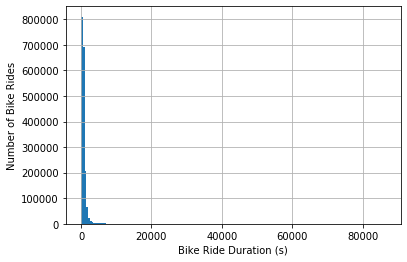

In [124]:
binsize = 500
bins = np.arange(0, gobike_2018_cln['duration_sec'].max()+binsize, binsize)

gobike_2018_cln['duration_sec'].hist(bins=bins)
plt.xlabel('Bike Ride Duration (s)')
plt.ylabel('Number of Bike Rides')
plt.show()

We can see that we have points with values above 80000 secondes. These are the people who rent the bike for one day (24 hours = 84600 secondes). Let's zoom in the histogram and change the binsize.

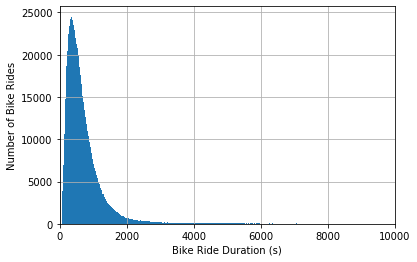

In [125]:
binsize = 10
bins = np.arange(0, gobike_2018_cln['duration_sec'].max()+binsize, binsize)

gobike_2018_cln['duration_sec'].hist(bins=bins)
plt.xlabel('Bike Ride Duration (s)')
plt.ylabel('Number of Bike Rides')
plt.xlim((0,10000))
plt.show()

We can see that the distribution is skewed to the right. Let's plot it on a log scale!

In [126]:
log_durations = np.log10(gobike_2018_cln['duration_sec'])

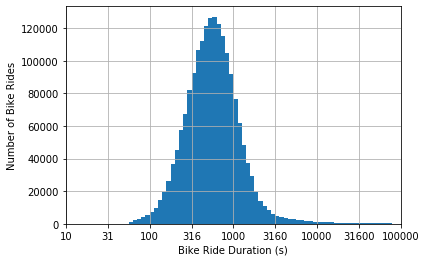

In [127]:
bin_size_log = 0.05 
bins_log =  np.arange(1, log_durations.max()+bin_size_log, bin_size_log)
log_durations.hist(bins=bins_log)
plt.xlim((1, 5))
plt.xticks([1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5], [10, 31, 100, 316, 1000, 3160, 10000, 31600,100000])
plt.xlabel('Bike Ride Duration (s)')
plt.ylabel('Number of Bike Rides')
plt.show()

We can see that most bike rides durations are between 300 secondes and 1000 secondes. With very low occurences of 

### Start Time (derived features)

Let's analyze the start time data. This analysis is to be done on different levels. I propose to analyze the months, the day of week, and the time of day (i.e. which hour). 


#### Hour of the day:

In [128]:
hour_data = gobike_2018_cln.groupby('hour_of_day')['start_time'].count()
hour_data

hour_of_day
0      10158
1       5841
2       3679
3       2105
4       2718
5      10010
6      36256
7     101475
8     206081
9     160066
10     83603
11     78976
12     89340
13     87062
14     82670
15     96219
16    142347
17    218862
18    170124
19    102765
20     65825
21     46466
22     30792
23     18510
Name: start_time, dtype: int64

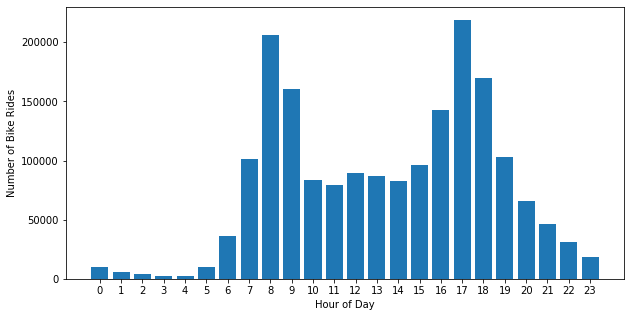

In [129]:
plt.figure(figsize=(10,5))
plt.bar(hour_data.index, hour_data)
plt.xticks(hour_data.index,hour_data.index)
plt.xlabel('Hour of Day')
plt.ylabel('Number of Bike Rides')
plt.show()

We can see that the distribution is quite bimodel. Most rides take place around 8-9 in the morning and 17-18 in the afternoon. This corresponds to the going to work coming out of work times.

#### Day of the Week

In [130]:
week_data = gobike_2018_cln.groupby('day_of_week')['start_time'].count()
week_data

day_of_week
Sunday       151893
Monday       292878
Tuesday      317540
Wednesday    314495
Thursday     312258
Friday       288746
Saturday     174140
Name: start_time, dtype: int64

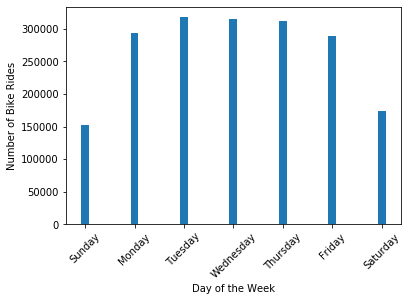

In [131]:
plt.bar(range(5,40,5),week_data.values)
plt.xticks(range(5,40,5), week_data.index,rotation=45)
plt.xlabel('Day of the Week')
plt.ylabel('Number of Bike Rides')
plt.show()

We can still observe that most bike rides are done during working days. 

#### Months:

In [132]:
month_data = gobike_2018_cln.groupby('month')['start_time'].count()

In [133]:
month_data

month
January       94802
February     106718
March        111382
April        131169
May          179125
June         193907
July         196038
August       189250
September    184635
October      200102
November     133651
December     131171
Name: start_time, dtype: int64

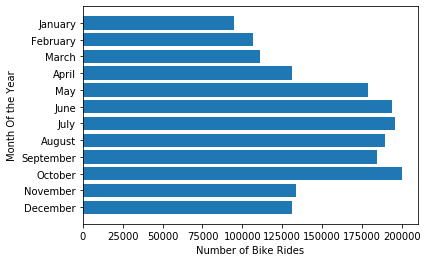

In [134]:
fig, ax = plt.subplots()
ax.barh(range(1,13), month_data.values)
ax.set_yticks(range(1,13))
ax.set_yticklabels(month_data.index)
ax.invert_yaxis()
plt.ylabel('Month Of the Year')
ax.set_xlabel('Number of Bike Rides')
plt.show()

We can notice that the number of bike rides increases from May to October. This is most like due to weather. Well see that later when we deal with the weather data.

### Start Stations.

We will see which station are more common as start point and those that are less popular. Since we have 331 station it is not interesting to show all of them. Therefore I will plot only the top 10 and worst 10 stations. 

In [135]:
departure_stat = gobike_2018_cln.groupby('start_station_id')['start_time'].count().sort_values()
departure_stat

start_station_id
48        11
374       25
358       52
359       91
301       93
       ...  
81     33716
58     34918
30     35092
67     37617
15     38461
Name: start_time, Length: 331, dtype: int64

#### Top 10 departure stations

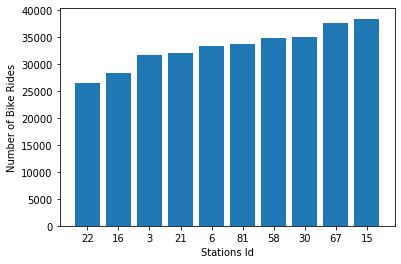

In [136]:
plt.bar(range(0,10), departure_stat.values[-10:])
plt.xticks(range(0,10), departure_stat.index[-10:])
plt.xlabel('Stations Id')
plt.ylabel('Number of Bike Rides')
plt.show()

I don't like this ploting, it's hard to interpret. Having only the station id is not intuitive. Let's try and plot it with the station names and with horizontal bars.

In [137]:
names = []
for elt in departure_stat.index[-10:]:
    names.append(stations_2018[stations_2018['station_id']==elt]['station_name'].values[0])

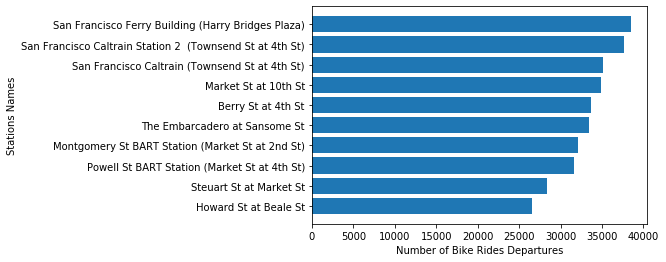

In [138]:
fig, ax = plt.subplots()
ax.barh(range(0,10), departure_stat.values[-10:])
ax.set_yticks(range(0,10))
ax.set_yticklabels(names)
plt.ylabel('Stations Names')
plt.xlabel('Number of Bike Rides Departures')
plt.show()

Now this is better easier to interpretate. Let's do the same for the worst 10 stations.

#### Worst 10 Departure Stations.

In [139]:
w_names = []
for elt in departure_stat.index[:10]:
    w_names.append(stations_2018[stations_2018['station_id']==elt]['station_name'].values[0])

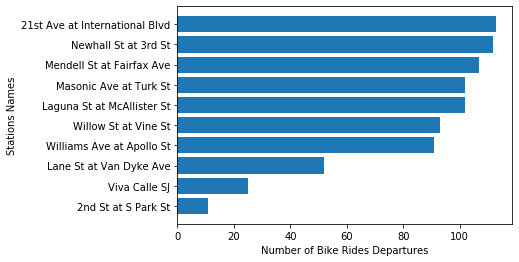

In [140]:
fig, ax = plt.subplots()
ax.barh(range(0,10), departure_stat.values[:10])
ax.set_yticks(range(0,10))
ax.set_yticklabels(w_names)
plt.ylabel('Stations Names')
plt.xlabel('Number of Bike Rides Departures')
plt.show()

We can see that these station are rarely used as departure during the year. Maybe their location is not much intuitive. 

### End Station: 

Here, I do the same the top 10 destinations and the worst 10. I propose to plot the bars directely with the names of the stations so it can be easily interpreted. 

In [141]:
destination_stat = gobike_2018_cln.groupby('end_station_id')["start_time"].count().sort_values()
destination_stat

end_station_id
374       15
48        33
358       57
359       87
380       89
       ...  
21     35955
6      39222
30     42970
15     44113
67     50000
Name: start_time, Length: 331, dtype: int64

#### Top 10 Destinations: 

In [142]:
d_names = []
for elt in destination_stat.index[-10:]:
    d_names.append(stations_2018[stations_2018['station_id']==elt]['station_name'].values[0])

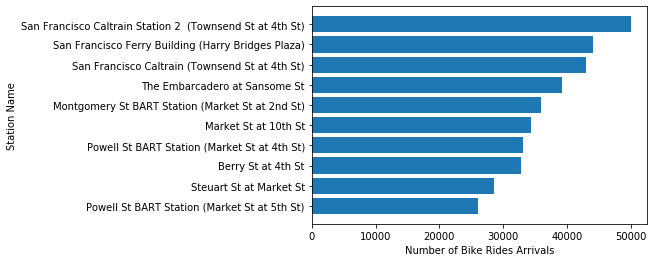

In [143]:
fig, ax = plt.subplots()
ax.barh(range(0,10), destination_stat[-10:])
ax.set_yticks(range(0,10))
ax.set_yticklabels(d_names)
plt.xlabel('Number of Bike Rides Arrivals')
plt.ylabel('Station Name')
plt.show()

#### The 10 Worst Destinations:

In [144]:
wd_names = []
for elt in destination_stat.index[:10]:
    wd_names.append(stations_2018[stations_2018['station_id']==elt]['station_name'].values[0])

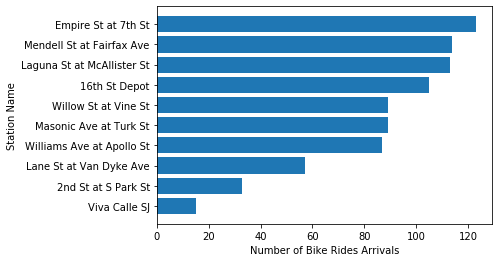

In [145]:
fig, ax = plt.subplots()
ax.barh(range(0,10), destination_stat.values[:10])
ax.set_yticks(range(0,10))
ax.set_yticklabels(wd_names)
plt.xlabel('Number of Bike Rides Arrivals')
plt.ylabel('Station Name')
plt.show()

We can see that almost the same stations that are with the lowest departure number are the ones with the lowest arrival numbers. It seems these stations require some action taking. Maybe drop the station or move it somewhere else. 

### Bike Id: 

I don't think this feature is quite pertinent for our investigation. 

### User Type: 

In [146]:
type_data = gobike_2018_cln.groupby('user_type')['start_time'].count()

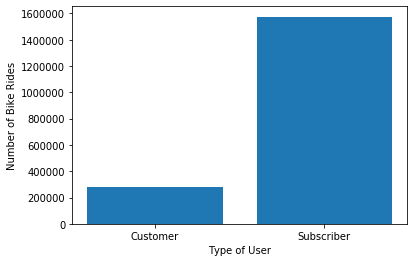

In [147]:
plt.bar(range(0,type_data.shape[0]),type_data.values)
plt.xticks(range(0,type_data.shape[0]), type_data.index)
plt.xlabel('Type of User')
plt.ylabel('Number of Bike Rides')
plt.show()

Most of the trips are made by subscribers rather than occasional customers. 

### Bike Share: 

Let's see how many share their bikes during the trip.

In [149]:
bs_data = gobike_2018_cln.groupby('bike_share_for_all_trip')['start_time'].count()

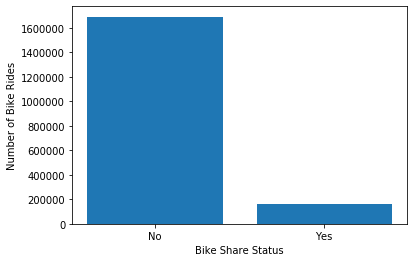

In [150]:
plt.bar(range(0,len(bs_data)), bs_data.values)
plt.xticks(range(0,len(bs_data)), bs_data.index)
plt.xlabel('Bike Share Status')
plt.ylabel('Number of Bike Rides')
plt.show()

Most rides are done by users that do not share the bike.

### Departures vs Arrivals.
Before we go on, we have computed the number of departures per station Id. And we computed the number of arrivals per station Id. Let's check for what I call the campus effect. 

I define the two concepts (only related to this study): 
- Campus effect: is when a station has more arrivals than departures
- Downtown effect: is when a station has more departures than arrivals

In [151]:
departure_stat.rename('n_departures', inplace = True)
destination_stat.rename('n_arrivals', inplace = True)
dep_arr_stat = pd.concat([departure_stat, destination_stat], axis=1)
dep_arr_stat.head(5)

,n_departures,n_arrivals
3,31656,33086
4,6058,6041
5,25007,26002
6,33390,39222
7,8658,8566


In [152]:
dep_arr_stat['arr_dep'] = dep_arr_stat['n_arrivals']-dep_arr_stat['n_departures']
dep_arr_stat.sort_values(by=['arr_dep'], inplace = True)
dep_arr_stat.head(5)

,n_departures,n_arrivals,arr_dep
243,14118,5079,-9039
52,6444,2610,-3834
256,5927,2704,-3223
163,10359,7313,-3046
253,4778,1849,-2929


#### Top 10 Stations with Campus effect

In [153]:
campus_eff_names = []
for elt in dep_arr_stat['arr_dep'].index[-10:]:
    campus_eff_names.append(stations_2018[stations_2018['station_id']==elt]['station_name'].values[0])

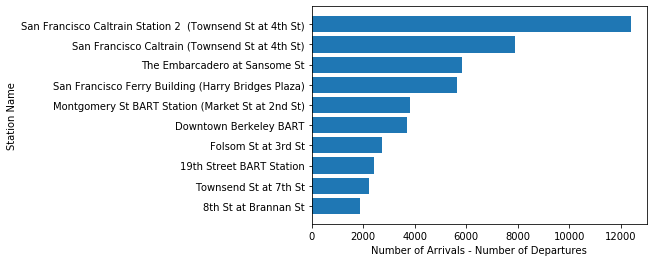

In [154]:
fig, ax = plt.subplots()
ax.barh(range(10), dep_arr_stat['arr_dep'].values[-10:])
ax.set_yticks(range(10))
ax.set_yticklabels(campus_eff_names)
plt.xlabel('Number of Arrivals - Number of Departures')
plt.ylabel('Station Name')
plt.show()

#### Top 10 Stations with Downtown effect

In [155]:
dt_eff_names = []
for elt in dep_arr_stat['arr_dep'].index[:10]:
    dt_eff_names.append(stations_2018[stations_2018['station_id']==elt]['station_name'].values[0])

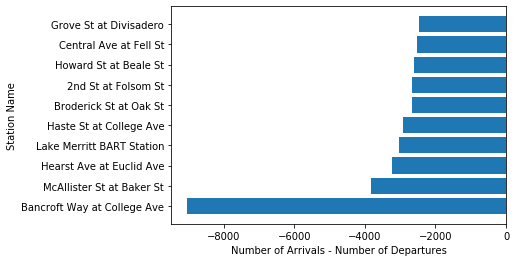

In [156]:
fig, ax = plt.subplots()
ax.barh(range(10), dep_arr_stat['arr_dep'].values[:10])
ax.set_yticks(range(10))
ax.set_yticklabels(dt_eff_names)
plt.xlabel('Number of Arrivals - Number of Departures')
plt.ylabel('Station Name')
plt.show()

So yes we can see that both effect are present. However, they are reversed not like what I expected. Stations near campus like the Bancroft Way at Collage Avenue which is close to Berkeley University has more departures that arrivals. While the city center has the reverse effect. Is this caused becaused there is a difference between France and the USA? Maybe this is because students are not concentrated near university? 

### Most Taken Paths:

Let's try and figure out what are the most taken paths.

In [157]:
paths_data = gobike_2018_cln.groupby(['start_station_id','end_station_id'],
                                     as_index=False)['start_time'].count()
paths_data.sort_values(by='start_time',inplace=True)
paths_data.tail()

,start_station_id,end_station_id,start_time
459,6,15,3795
21822,196,182,3952
9455,81,15,4534
460,6,16,4778
1551,15,6,7585


we can see that two stations are visited many times and present is the top 5 paths. Station id 6: The Embarcadero at Sansome St and station id 15: San Francisco Ferry Building (Harry Bridges Plaza).

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

When I ploted the histogram of the duration of the paths I noticed that the distribution was skewed to the right. Some points where a bit far from the mode of the distribution but their duration is completely logical because bike rental services allows you to keep the bike over night so the duration of a path of over 80000 secondes is normal. However, I computed the log of the duration so that the distribution becames more normal. And easier to interpretate. Then, I notice that most rides have a duration of 5 to 18 minutes. 

I'm looking forward to investigate the relationship of this variable with other variables.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

I've done some features engineering especially on the start time to extract the time of the day the day of the weeks and the months. And quite impressively I found that the number of rides has a bimodal distribution over the time of the day. In the figure we can see that the modes are around 8 and 9 in the morning and 17 and 18 in the afternoon. Corresponding to start and end of working hours or studying hours. The number of rides is quite important on the working days than on the weekend. Finally, the months with potentially better weather are the ones with the higher number of bike rides. I can't wait until this is prooved. 

## Bivariate Exploration

In the first section, we analyzed the number of rides in function of the different features. Here, we will try to see the relationships between the variables and in particular between the durations and the other variables. 

Most of the variables presented in the dataframe are qualitative except for the duration which is quantitive. Therefore, I propose to plot some violin plots. 

In [158]:
base_color = sns.color_palette()[0]

### Duration vs Hour of the day:

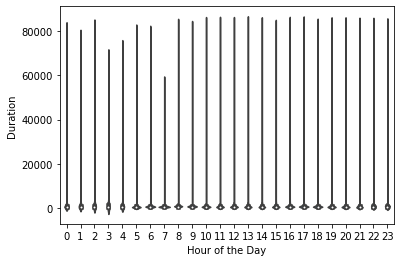

In [119]:
sns.violinplot(data = gobike_2018_cln, x = 'hour_of_day', y = 'duration_sec', color = base_color)
plt.xlabel("Hour of the Day")
plt.ylabel("Duration")
plt.show()

As we can see the plot is not good. We cannot see anything. Therefore I propose to faceting according to the hour of the day.

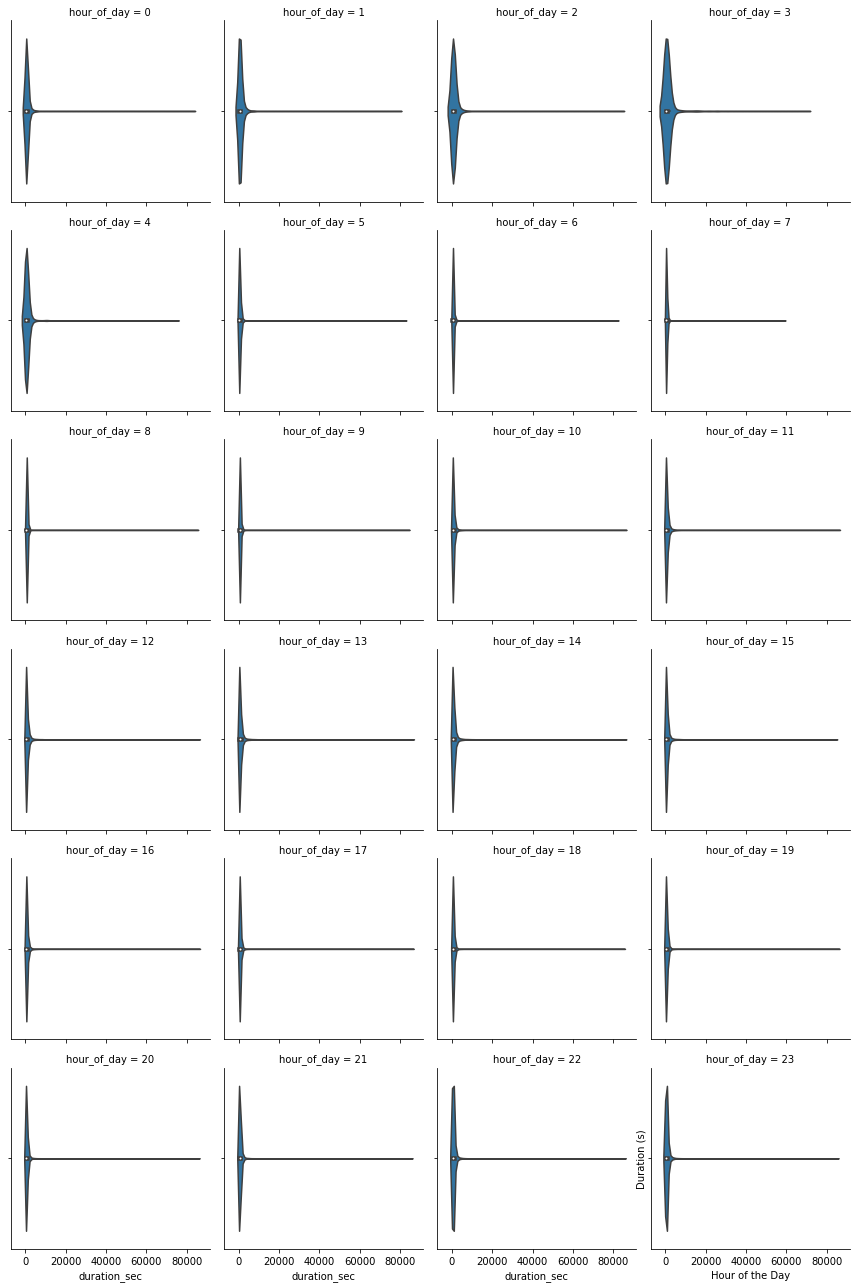

In [126]:
hours_view = sns.FacetGrid(data = gobike_2018_cln, col = 'hour_of_day', 
                           col_wrap = 4, col_order = hour_data.index)
hours_view.map(sns.violinplot, 'duration_sec')
plt.xlabel("Duration (s)")
plt.show()

This is hard to interpret. the only thing I can see is that the duration of the rids seems to be more distributed in the later hours of the night and the very early morning (i.e. people who are goind out or coming back home from a night out).

### Duration vs Day of the week:

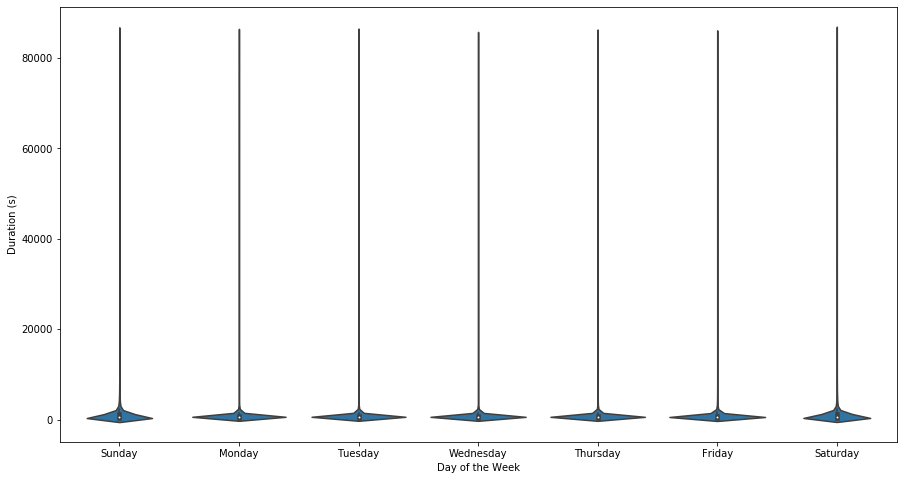

In [127]:
plt.figure(figsize=(15,8))
sns.violinplot(data = gobike_2018_cln, x = 'day_of_week', y = 'duration_sec', color = base_color)
plt.xlabel("Day of the Week")
plt.ylabel("Duration (s)")
plt.show()

Let's limit the duration to 10000 and see the comparison. 

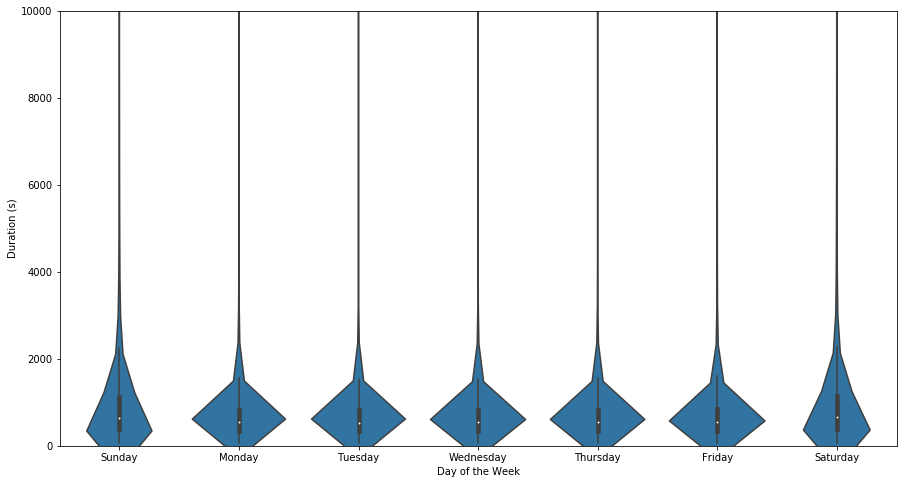

In [128]:
plt.figure(figsize=(15,8))
sns.violinplot(data = gobike_2018_cln, x = 'day_of_week', y = 'duration_sec', color = base_color)
plt.ylim((0,10000))
plt.xlabel("Day of the Week")
plt.ylabel("Duration (s)")
plt.show()

Now it's clearer, and we can see that on the weekends the duration of the bike rides becames a bit more distributed and tends to be a bit larger.

### Duration vs Month:

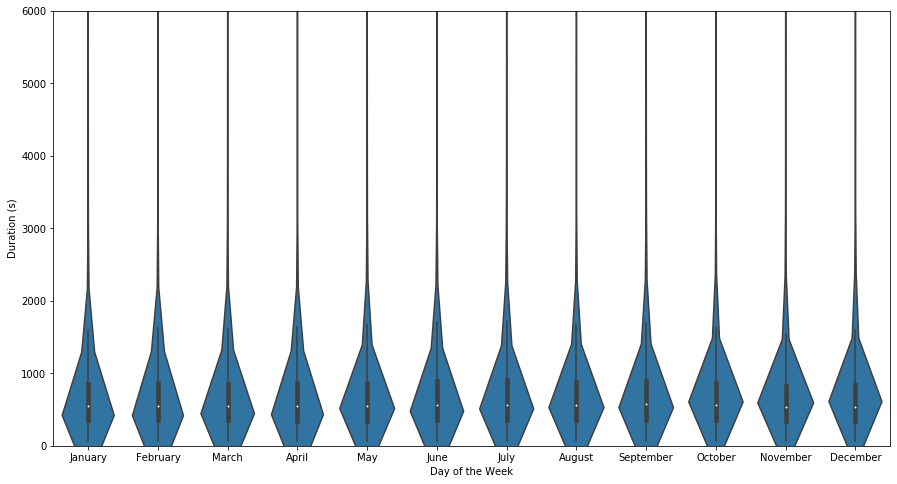

In [129]:
plt.figure(figsize=(15,8))
sns.violinplot(data = gobike_2018_cln, x = 'month', y = 'duration_sec', color = base_color)
plt.ylim((0,6000))
plt.xlabel("Month")
plt.ylabel("Duration (s)")
plt.show()

It seems like the duration of the rides is evenly distributed for all the months. Even though there might be some difference but it doesn't look like it is significant. 

### Duration vs User Type:

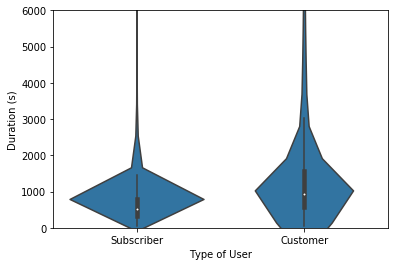

In [131]:
sns.violinplot(data = gobike_2018_cln, x = 'user_type', y = 'duration_sec', color = base_color)
plt.ylim((0,6000))
plt.xlabel("Type of User")
plt.ylabel("Duration (s)")
plt.show()

Now this is an interesting comparaison. It seems like Subscribers or everyday customers have tendencies to use the bike for a sorter amount of time than the time spent by the occasional customer. I guess this is explained by the fact that subscribers use the base on a daily basic to go to work from or to the university. While I guess the occasional customers are more likely to be tourist so they would us the bike for a longer period of time. 

### Duration vs Bike Share:

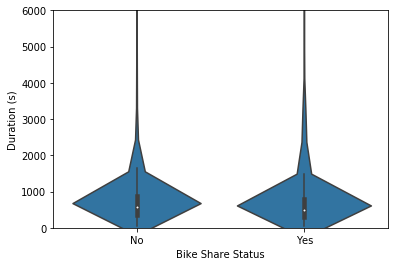

In [132]:
sns.violinplot(data = gobike_2018_cln, x = 'bike_share_for_all_trip', y = 'duration_sec', color = base_color)
plt.ylim((0,6000))
plt.xlabel("Bike Share Status")
plt.ylabel("Duration (s)")
plt.show()

It seems like the duration of the ride does not depend on the bike sharing status. Now this drives me to wonder who are more likely to share bikes subscribers or customers? Let check this out. 

### User Type vs Bike Share:

Since the two variables are qualitative, I use the clustered bar charts.

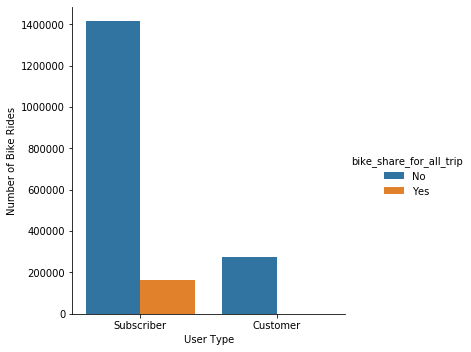

In [133]:
sns.catplot(x='user_type', hue='bike_share_for_all_trip', data=gobike_2018_cln,
           kind='count')
plt.xlabel('User Type')
plt.ylabel('Number of Bike Rides')
plt.show()

This is quite surprising, It seems like the subscirbers are the one willing to share the bike along the trip. 

Now We saw that the occasional customers tends to use the bike for longer periods than subscribers. Now let's see when do they tend to use the bike. 

### User Type vs Hour of the Day:

<Figure size 1800x576 with 0 Axes>

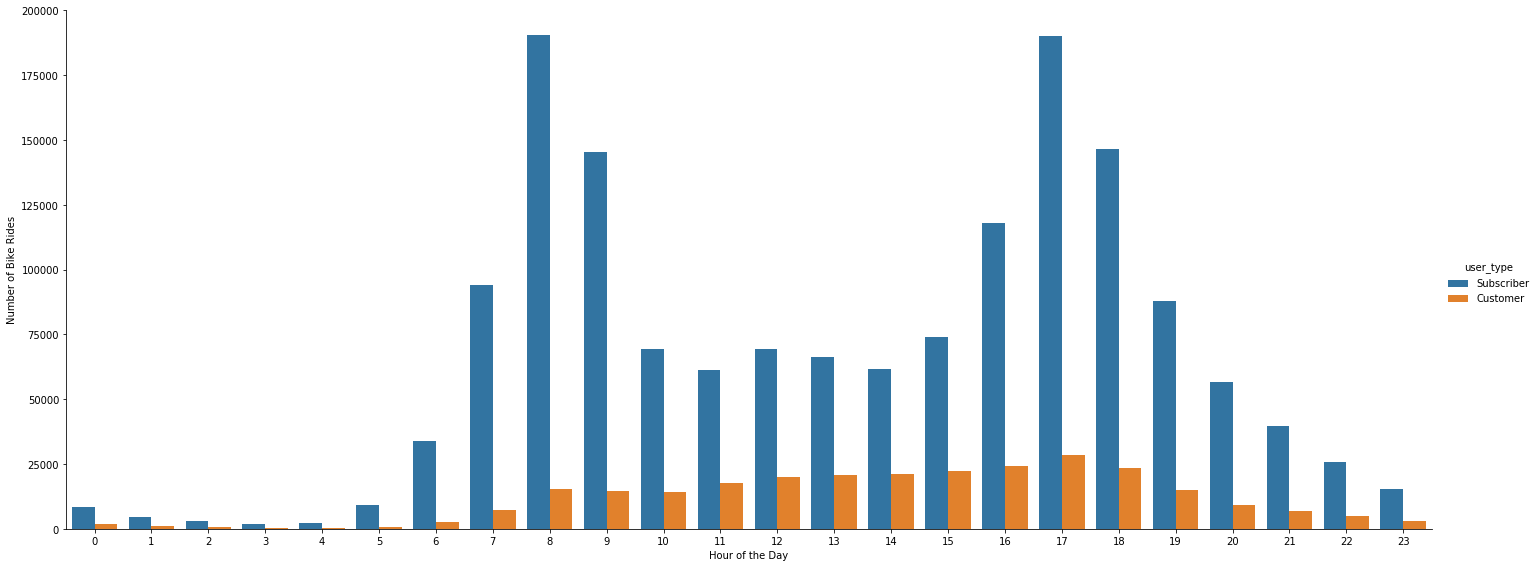

In [159]:
sns.catplot(x='hour_of_day', hue='user_type', data=gobike_2018_cln,
           kind='count', height=8, aspect=2.5)
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Bike Rides')
plt.show()

It seems like the subscribers time of usage is bimodal. This proves that these everyday users are using the bike more to go to and from work/university. While the distribution of the occasional customers is quite difficult to interpret. It's not totally bimodel. 

### User Type vs Day of the Week:

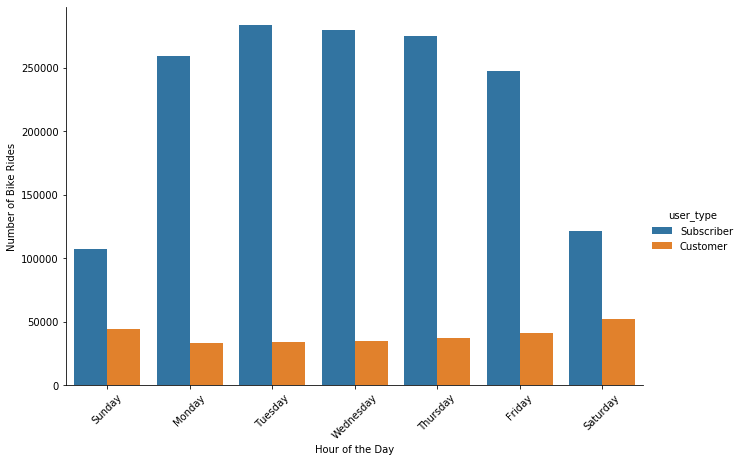

In [160]:
sns.catplot(x='day_of_week', hue='user_type', data=gobike_2018_cln,
           kind='count', height=6, aspect=1.5)
plt.xticks(rotation=45)
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Bike Rides')
plt.show()

In this graph, we can see that the day to day user are more likely to be using the bike on working day. While the occasional customers is quite the same with small rises on the weekends. This seems to support the assumption that the occasional customers are more like to be tourists.

### User Type vs Month:

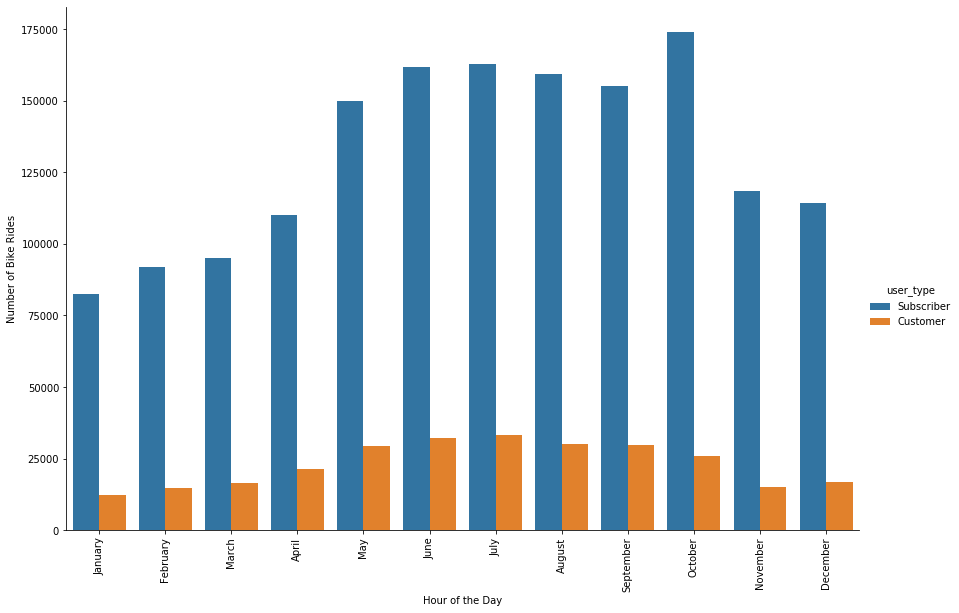

In [161]:
sns.catplot(x='month', hue='user_type', data=gobike_2018_cln,
           kind='count', height=8, aspect=1.5)
plt.xticks(rotation=90)
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Bike Rides')
plt.show()

This graph can give us two major informations: 
- The subscribers seems to be using the bike mostly during october. This is quite normal it's the start of the academic year and everyone is excited about using the bikes. The number of rides drops during the few next month, maybe because of the temperatures? We will see about this next. Then it rises again with the month of May temperatures and weather also? 
- While the occasional customers rides peak duing the month of July. Is this also correlated with the weather? 

### Top 10 Depature Stations vs User Type

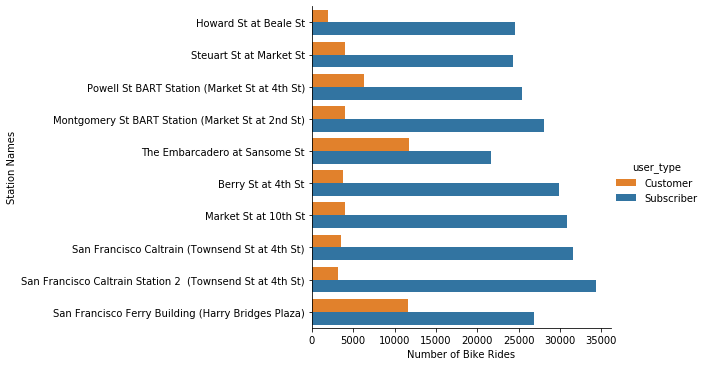

In [162]:
palette ={"Subscriber":"C0","Customer":"C1"}
g =sns.catplot(y='start_station_id', hue = 'user_type' ,
            data = gobike_2018_cln[gobike_2018_cln['start_station_id'].isin(departure_stat.index[-10:])],
            kind = 'count', palette = palette, order = departure_stat.index[-10:])
g.set_yticklabels(names)
plt.xlabel('Number of Bike Rides')
plt.ylabel('Station Names')
plt.show()

### Top 10 Destination Stations vs User Type

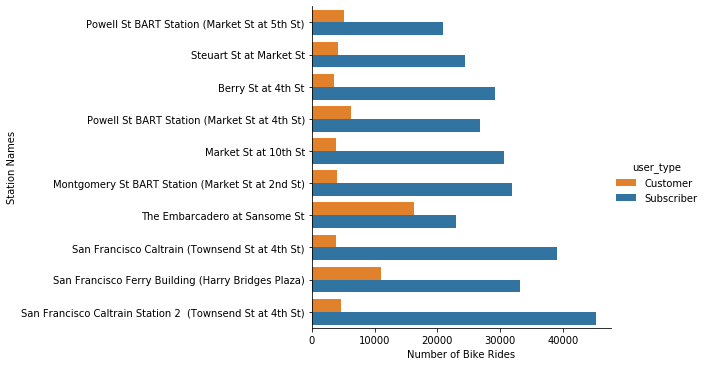

In [179]:
palette ={"Subscriber":"C0","Customer":"C1"}
g =sns.catplot(y='end_station_id', hue = 'user_type' ,
            data = gobike_2018_cln[gobike_2018_cln['end_station_id'].isin(destination_stat.index[-10:])],
            kind = 'count', palette = palette, order = destination_stat.index[-10:])
g.set_yticklabels(d_names)
plt.xlabel('Number of Bike Rides')
plt.ylabel('Station Names')
plt.show()

We can see that of the top 10 end and start stations the customer tend to go with the stations that are close to the transportation stations. The Embarcadero station is the most used station as both start and end point. Seems like this station is close to the Alcatraz Ferry tour (I googled the location of the station). 

Now We can notice that the top 2 end/start stations of the customers are the next to ferry stations. 

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

- The duration of the bike rides was the same all over the different hours of the day. 
- We found that the duration of the rides is slightly different on the weekend than on the other days of the week. 
- However, this duration is quite the same regardless the month.
- The distribution of the duration is the same whether the user shared the bike or not. 
- There is a difference in the distribution of duration according to the user type. 

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?
We noticed that the duration of the ride depends on the type of the user. Based on this information we proposed some futher investigations and we found:
- only the subscriber shared the rides. 
- the distribution of the occasional customers are not clearly bimodel. There is a peak around 18h but it's hard to interprete the distribution.
- The usage of bike by occasional customers seems to increase on the weekends. 
- And this usage peak around July. 


As we saw before, all the variables do not present a big influence on the duration of the bike rides. Only the user type and the weekends showed a slightly different variation. So continuing with this investigation wouldn't get us further. 

Therefore, I introduce the weather dataset. I propose to analyze the different interaction of the weather with the number of rides and their duration. This might clarify some points about the identity of the users of type customer.  

### Weather Data Exploration:

The weather data has several features. I add the time and the month future to facilitate some calculation. I focus the study on the weather describtion and the temperature. 

In [163]:
sf_2018_w_df.head(5)

,time,part_of_day,wind_speed,pressure,sea_level_pressure,wind_direction,temperature,apparent_temperature,humidity,clouds_coverage,weather_class,rain,snow,solar_radiation,visibility,ultra_violet_idx
0,2018-01-01 00:00:00,n,1.2,1021.0,1022.4,60.0,11.35,11.35,83.0,78,Overcast clouds,0.0,0,0.0,5.0,0.0
1,2018-01-01 01:00:00,n,1.2,1021.2,1022.6,140.0,10.55,10.55,88.0,83,Overcast clouds,0.0,0,0.0,5.0,0.0
2,2018-01-01 02:00:00,n,0.8,1021.2,1022.6,158.0,9.25,9.25,89.0,85,Overcast clouds,0.0,0,0.0,5.0,0.0
3,2018-01-01 03:00:00,n,0.8,1021.3,1022.7,207.0,8.95,8.95,91.0,82,Overcast clouds,0.0,0,0.0,1.5,0.0
4,2018-01-01 04:00:00,n,0.8,1021.4,1022.8,280.0,8.65,8.65,91.0,95,Overcast clouds,0.0,0,0.0,1.5,0.0


In [164]:
sf_2018_w_df['hour_of_day'] = sf_2018_w_df['time'].apply(lambda x: x.hour)
sf_2018_w_df['month'] = sf_2018_w_df['time'].apply(lambda x: x.strftime('%B'))
sf_2018_w_df['month'] = sf_2018_w_df['month'].astype(ordered_month)

In [165]:
sf_2018_w_df.head(2)

,time,part_of_day,wind_speed,pressure,sea_level_pressure,wind_direction,temperature,apparent_temperature,humidity,clouds_coverage,weather_class,rain,snow,solar_radiation,visibility,ultra_violet_idx,hour_of_day,month
0,2018-01-01 00:00:00,n,1.2,1021.0,1022.4,60.0,11.35,11.35,83.0,78,Overcast clouds,0.0,0,0.0,5.0,0.0,0,January
1,2018-01-01 01:00:00,n,1.2,1021.2,1022.6,140.0,10.55,10.55,88.0,83,Overcast clouds,0.0,0,0.0,5.0,0.0,1,January


### Univariate Exploration: 

As I said before. This study focuses only on the temperature and the weather class. The hour_of_day and month features are used to facilitate some computations. 

#### Temperature:

Please note that the temperature is presented in a scientific format using the celcius scale

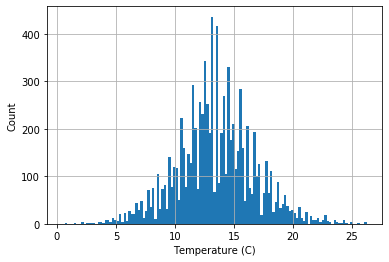

In [166]:
T_bin_size = 0.2 
T_bins = np.arange(sf_2018_w_df['temperature'].min()-T_bin_size,
                   sf_2018_w_df['temperature'].max()+T_bin_size, T_bin_size)
sf_2018_w_df['temperature'].hist(bins=T_bins)
plt.xlabel('Temperature (C)')
plt.ylabel('Count')
plt.show()

This is a great we have a nice normal distribution of temperatures. 

#### Weather Class

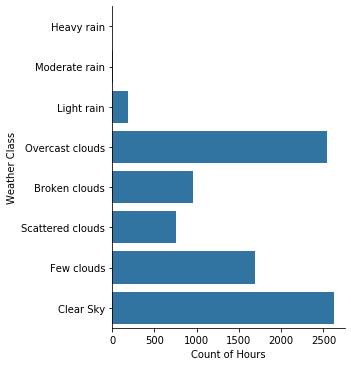

In [196]:
sns.catplot(y = 'weather_class', data = sf_2018_w_df, kind = 'count',
            color = base_color, height=8, aspect=1)
plt.xlabel('Count of Hours')
plt.ylabel('Weather Class')
plt.show()

Well most of the time the weather is good in San Francisco. Temperature are also fairly warm no extrem low temperature. Actually, there are no negative temperatures. Very low rain percipitations, this explains why there are alot of bike rides in winter and automne although they decrease the number is still considerable. 

### Bivariate Exploration: 

#### Temperature vs Hour of Day

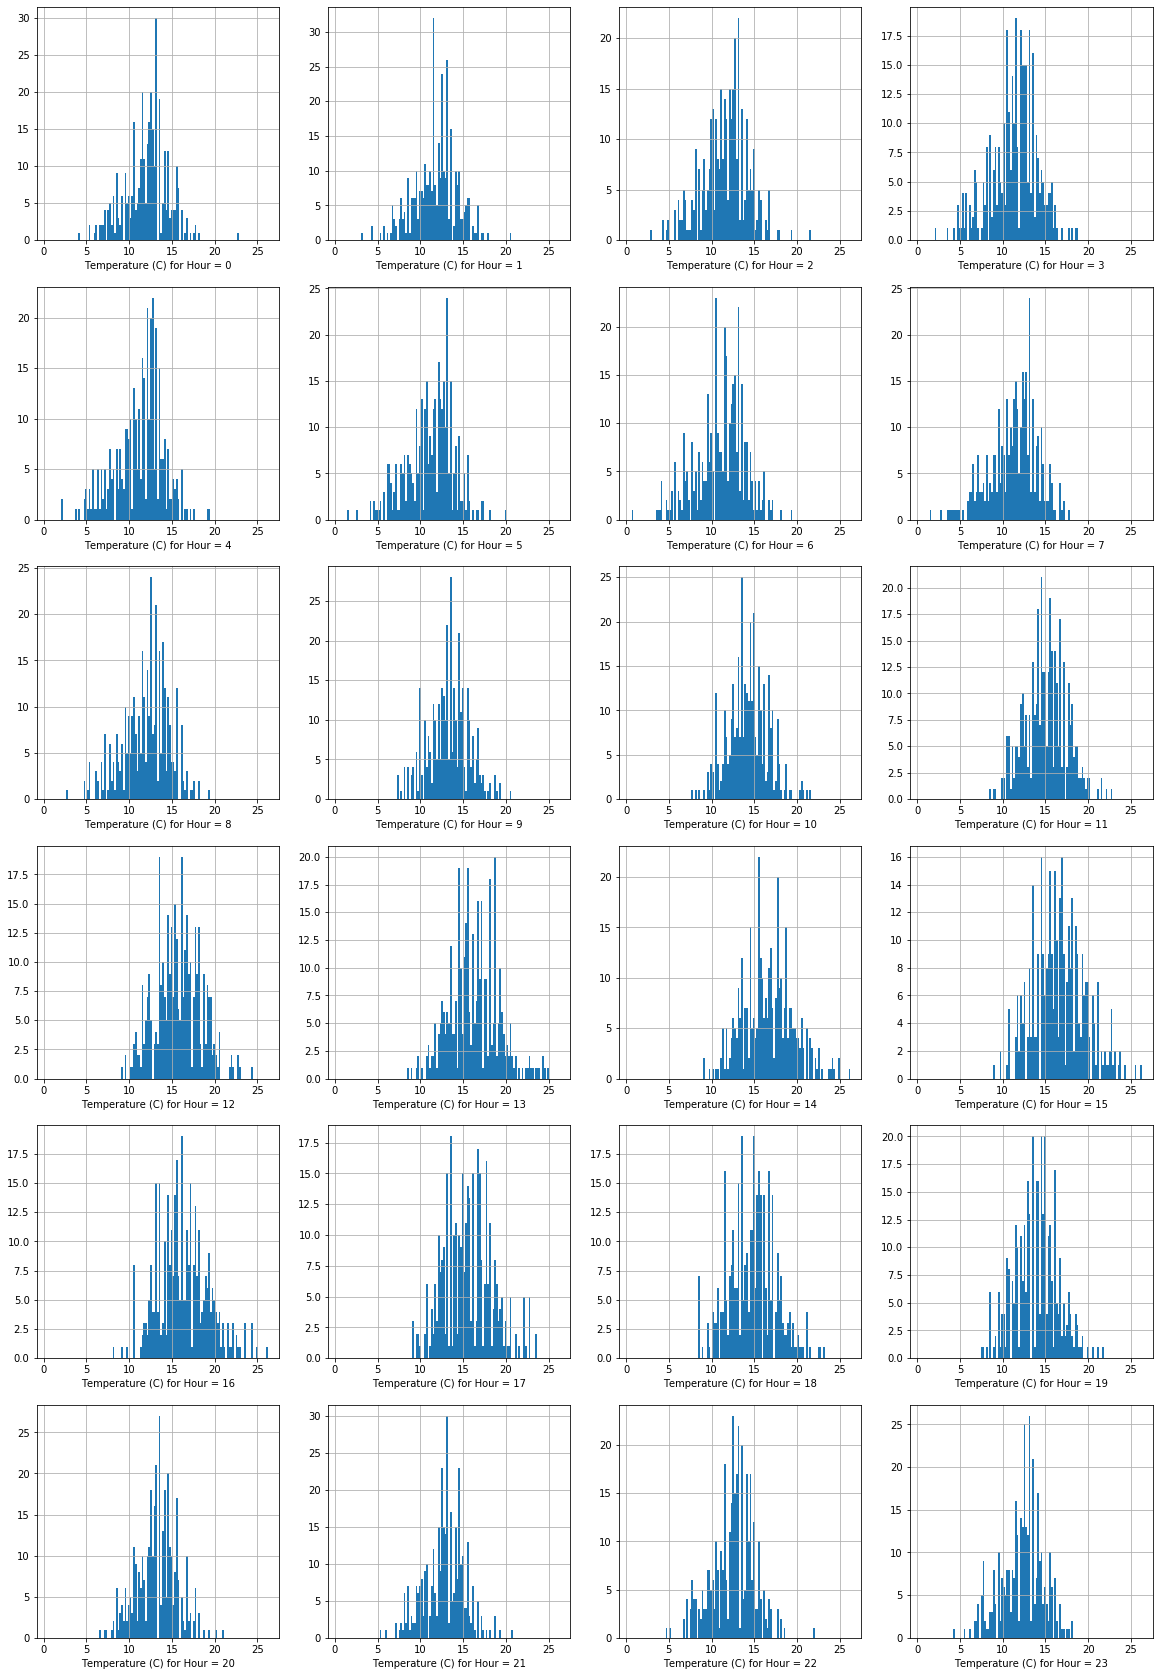

In [208]:
plt.figure(figsize=(20,30))
i=1 
for h in range(24):
    plt.subplot(6,4,i)
    sf_2018_w_df[sf_2018_w_df['hour_of_day']==h]['temperature'].hist(bins=T_bins)
    plt.xlabel('Temperature (C) for Hour = {}'.format(h))
    i+=1
plt.show()

We can notice that starting from hour = 11 to 19 the distribution of temperature has a mean value that is hotter than the other hours. It's quite normal, this is the time the sun is up in the sky. 

#### Temperature vs Month

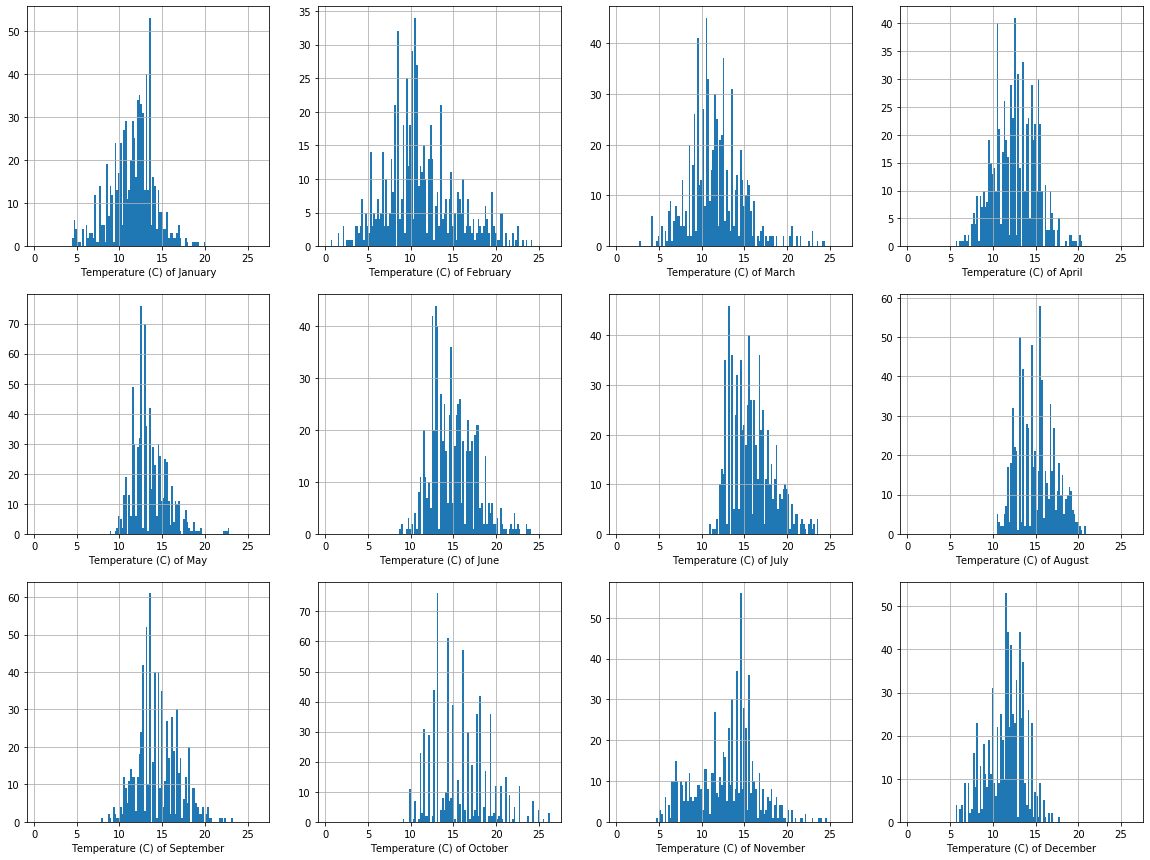

In [210]:
plt.figure(figsize=(20,15))
i=1 
for m in ordinal_month_values:
    plt.subplot(3,4,i)
    sf_2018_w_df[sf_2018_w_df['month']==m]['temperature'].hist(bins=T_bins)
    plt.xlabel('Temperature (C) of {}'.format(m))
    i+=1
plt.show()

These results are quite logical. Summers are to known to be hotter than other seasons. But we can see that the temperature levels are always quite worm and allow to use the bike.

I stop at this point when dealing with the weather data alone. Now I want to cross these data with the bike rides so that I can performe my intended multivariate exploration.

## Bivariate Mixed Data Exploration

For the purpose of multivariate exploration, I must merge the weather and the bike ride information to facilitate the plotting. 

In [167]:
gobike_2018_cln['date'] = gobike_2018_cln['start_time'].apply(lambda x: str(x.date()))
sf_2018_w_df['date'] = sf_2018_w_df['time'].apply(lambda x: str(x.date()))
sf_2018_w_df['hour'] = sf_2018_w_df['time'].apply(lambda x: x.hour)

In [168]:
cross_ref_df = gobike_2018_cln.merge(sf_2018_w_df[['date', 'hour', 'temperature', 'weather_class']], 
                                     left_on=['date', 'hour_of_day'], right_on=['date', 'hour'])
cross_ref_df.head(2)

,duration_sec,start_time,end_time,start_station_id,end_station_id,bike_id,user_type,bike_share_for_all_trip,hour_of_day,day_of_week,month,date,hour,temperature,weather_class
0,75284,2018-01-31 22:52:35.239,2018-02-01 19:47:19.824,120,285,2765,Subscriber,No,22,Wednesday,January,2018-01-31,22,10.65,Overcast clouds
1,6477,2018-01-31 22:58:44.867,2018-02-01 00:46:41.908,236,160,1306,Customer,No,22,Wednesday,January,2018-01-31,22,10.65,Overcast clouds


#### Let's plot the duration as a function of temperature.

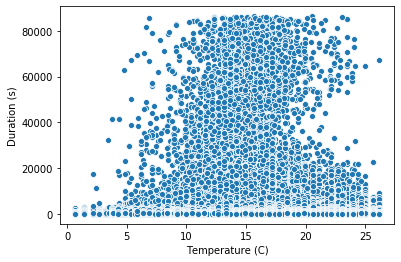

In [30]:
sns.scatterplot(x='temperature', y='duration_sec', data=cross_ref_df)
plt.xlabel('Temperature (C)')
plt.ylabel('Duration (s)')
plt.show()

It's hard to interpret this graph. We can see that the duration are higher for temperature in range of 10 to 20 celsius. Which mean that when temperature are low or high there is a tendency to avoid using the bikes. Or at least use them for a short period of time. 

we can see also that there is a high concentration of point for low duration. Let's highlight this information bu modifying the transperency of the points so that we can see where there are concentrated the most.

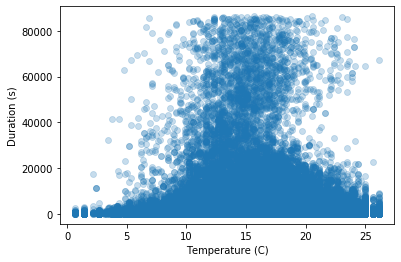

In [32]:
sns.scatterplot(x='temperature', y='duration_sec', data=cross_ref_df, alpha =0.25, edgecolor=None)
plt.xlabel('Temperature (C)')
plt.ylabel('Duration (s)')
plt.show()

Now its clearer that we have a high concentration of points for low duration of rides. I think these are the points of the subscribers. Since, they always use bike to go to and from university and work. We check this in the multivariate investigation.

Let's plot the number of rides per class of weather. 
This is more a univarite investigation. But I have other intentions behind. 

<Figure size 720x720 with 0 Axes>

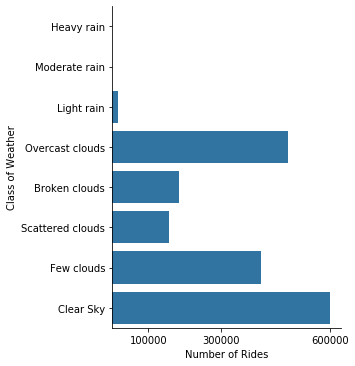

In [36]:
sns.catplot(y='weather_class', data=cross_ref_df, kind='count', color = base_color, height=8, aspect=1)
plt.xticks([100000,300000,600000],[100000,300000,600000])
plt.xlabel('Number of Rides')
plt.ylabel('Class of Weather')
plt.show()

Not surprising, the number of rides becomes bigger with better weather. However, the overcast clouds represents the seconds most common weather with the number of rides. I wonder when the occasional customers uses the bike the most. 

<Figure size 720x720 with 0 Axes>

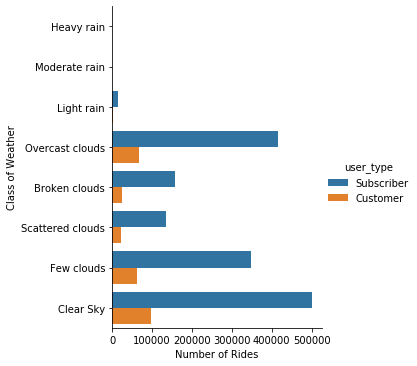

In [37]:
sns.catplot(y='weather_class', data=cross_ref_df, kind='count', hue = 'user_type', height=8, aspect=1)
plt.xlabel('Number of Rides')
plt.ylabel('Class of Weather')
plt.show()

Both the subscribers and the occasional customers have the same behaviour of bike usage vs the class of weather.

## Multivariate Exploration

### Temperature vs User Type vs Duration of Ride.

Let's investigate this point. 

First, I try with a simple scatter point in which the color of the marker is defined by the user type. 

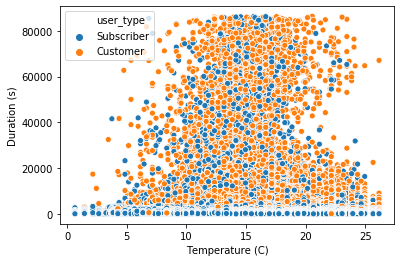

In [38]:
sns.scatterplot(x='temperature', y='duration_sec', hue = 'user_type', data=cross_ref_df)
plt.xlabel('Temperature (C)')
plt.ylabel('Duration (s)')
plt.show()

Well, it is hard to investigate this plot. Let's try to facet the plots. 

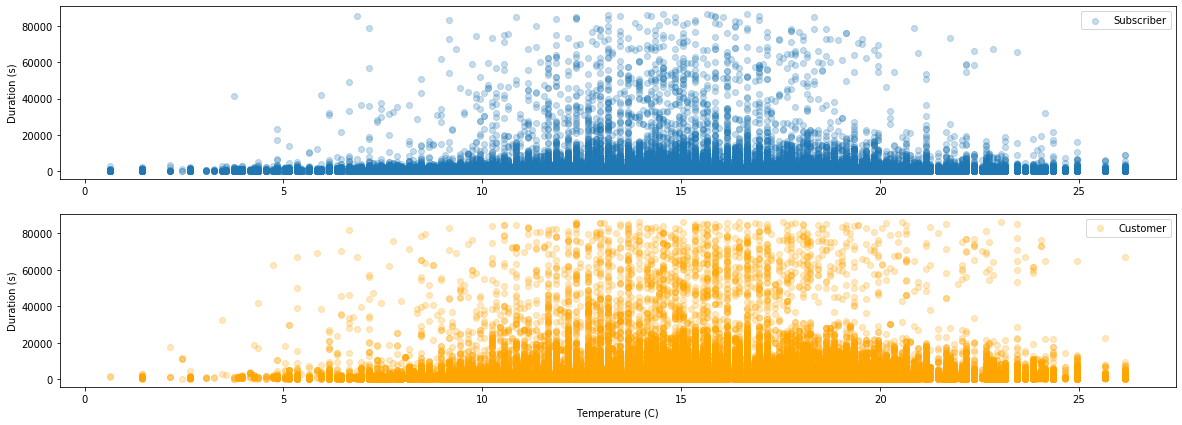

In [44]:
plt.figure(figsize=(20,7))
plt.subplot(2,1,1)
plt.scatter(x = cross_ref_df[cross_ref_df['user_type']=='Subscriber']['temperature'],
            y = cross_ref_df[cross_ref_df['user_type']=='Subscriber']['duration_sec'], 
            label = 'Subscriber', alpha = 0.25)
plt.legend()
plt.ylabel('Duration (s)')
plt.subplot(2,1,2)
plt.scatter(x = cross_ref_df[cross_ref_df['user_type']=='Customer']['temperature'],
            y = cross_ref_df[cross_ref_df['user_type']=='Customer']['duration_sec'], 
            label = 'Customer', alpha = 0.25, color = 'orange')
plt.legend()
plt.xlabel('Temperature (C)')
plt.ylabel('Duration (s)')
plt.show()

Now we can compare the two distribution easily. We can observe that the distribution of the subscribers duration is concentrated on low values. This is what we saw previously when we obtained the violin plot. While the distribution of the users of type customer is more open to larger durations.  From this plot we can see that the relationship betweel the temperature and the duration has a peak value between 10 and 20. But for hotter of colder temperature the durations are reduced. 

### Conclusion

Unfortunetly, the chosen dataset do not present a good example for the multivariate exploration. The dataset consists mainly of categorical variables. I tried by adding weather data to see some interactions between the features. 

This is not a classic dataset in which we have a variable we want to predict. I believe the dataset I choose is intended to derive some business decisions like which station to move or remove (as we saw earlier there is a station with only 20 departure over the whole year). Or which station to reinforce (those with a great amount of trafic). We could actually change the pricing for the subscriptions and for the occasional customers. 


## Bonus: 

As a bonus for this work, I propose to perform a quick analysis of the 2019 dataset to compare it to the data of the 2018. Sort of to assess the business actions taken in 2018 (I suppose they did take actions). 

Before we dig deeper in the analysis we can easily see that the number of stations increased from 331 in 2018 to 428 in 2019. This is clearly a decision made in 2018. We'll see how it did affects the company's performances.

### Feature engineering: 

We perform the same operations as done to the 2018's dataset:

In [169]:
gobike_2019_cln['hour_of_day'] = gobike_2019_cln['start_time'].apply(lambda x: x.hour)
gobike_2019_cln['day_of_week'] = gobike_2019_cln['start_time'].apply(lambda x: x.strftime('%A'))
gobike_2019_cln['day_of_week']  = gobike_2019_cln['day_of_week'].astype(ordered_days)
gobike_2019_cln['month'] = gobike_2019_cln['start_time'].apply(lambda x: x.strftime('%B'))
gobike_2019_cln['month']  = gobike_2019_cln['month'].astype(ordered_month)

gobike_2019_cln.head(5)

,bike_id,bike_share_for_all_trip,duration_sec,end_station_id,end_time,start_station_id,start_time,user_type,hour_of_day,day_of_week,month
0,4861,No,80825,196,2019-02-01 16:24:49.864,229,2019-01-31 17:57:44.613,Subscriber,17,Thursday,January
1,5506,No,65900,134,2019-02-01 15:16:54.173,4,2019-01-31 20:58:33.886,Subscriber,20,Thursday,January
2,2717,No,62633,157,2019-02-01 11:30:46.530,245,2019-01-31 18:06:52.924,Customer,18,Thursday,January
3,4557,No,44680,53,2019-02-01 08:10:50.318,85,2019-01-31 19:46:09.719,Customer,19,Thursday,January
4,2100,No,60709,28,2019-02-01 07:10:51.065,16,2019-01-31 14:19:01.541,Customer,14,Thursday,January


### Distribution of the Ride's Durations:

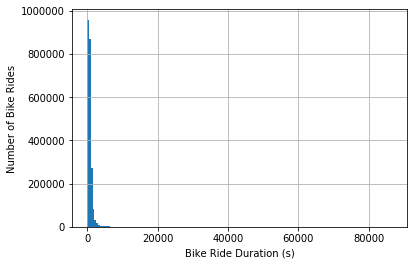

In [170]:
binsize = 500
bins = np.arange(0, gobike_2019_cln['duration_sec'].max()+binsize, binsize)

gobike_2019_cln['duration_sec'].hist(bins=bins)
plt.xlabel('Bike Ride Duration (s)')
plt.ylabel('Number of Bike Rides')
plt.show()

The distribution is also skewed to the right. Let's present it on a log scale.

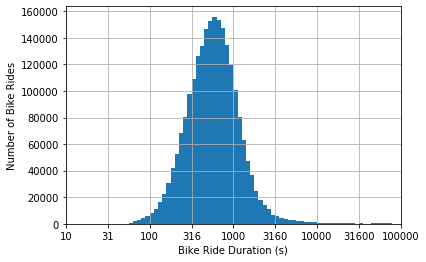

In [171]:
log_durations = np.log10(gobike_2019_cln['duration_sec'])
bin_size_log = 0.05 
bins_log =  np.arange(1, log_durations.max()+bin_size_log, bin_size_log)
log_durations.hist(bins=bins_log)
plt.xlim((1, 5))
plt.xticks([1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5], [10, 31, 100, 316, 1000, 3160, 10000, 31600,100000])
plt.xlabel('Bike Ride Duration (s)')
plt.ylabel('Number of Bike Rides')
plt.show()

Seems like the distribution of the duration did not change from 2018 to 2019. Maybe the hours of using the bikes are now distributed differently? 

### Hour of Day

In [172]:
hour_data_2019 = gobike_2019_cln.groupby('hour_of_day')['start_time'].count()

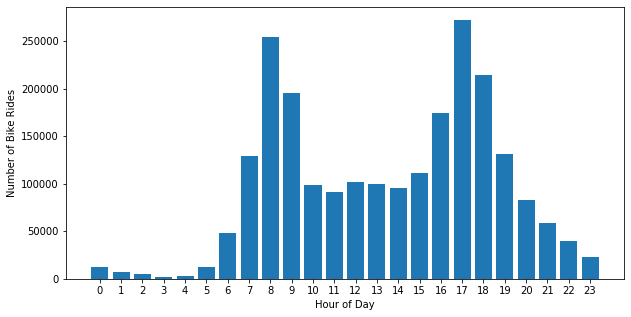

In [173]:
plt.figure(figsize=(10,5))
plt.bar(hour_data_2019.index, hour_data_2019)
plt.xticks(hour_data_2019.index,hour_data_2019.index)
plt.xlabel('Hour of Day')
plt.ylabel('Number of Bike Rides')
plt.show()

It is still the bimodal distribution with peaks around 8 and 17. I guess the structure of users did not change. 

### User Type vs Hour of the Day

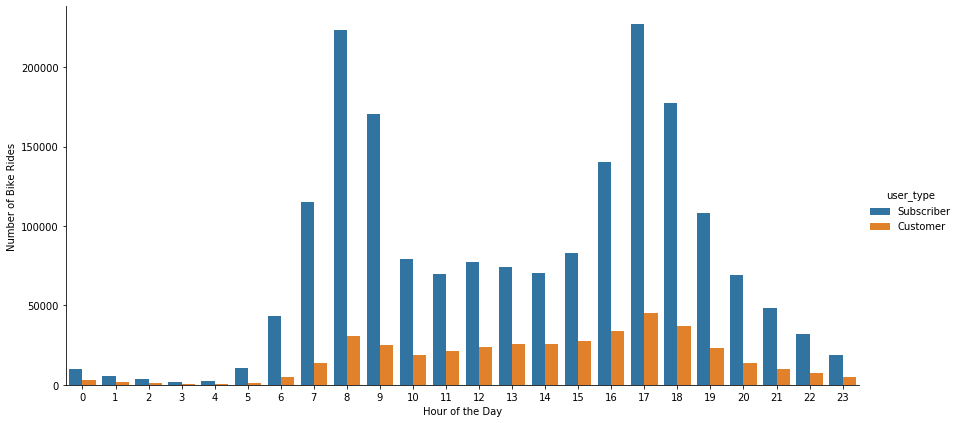

In [174]:
sns.catplot(x='hour_of_day', hue='user_type', data=gobike_2019_cln, height=6, 
            aspect=2, kind='count')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Bike Rides')
plt.show()

Here we can see that the occasinal customers usage is also bimodal. It's clearer that in 2018. Maybe after all the occasional customers are also students. 

### Day of Week:

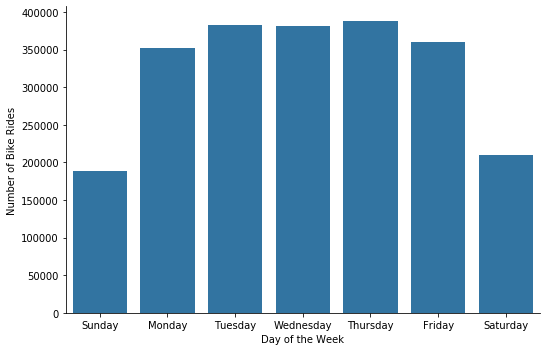

In [175]:
sns.catplot(x='day_of_week', data=gobike_2019_cln, height=5, 
            aspect=1.5, kind='count', color = base_color)
plt.xlabel('Day of the Week')
plt.ylabel('Number of Bike Rides')
plt.show()

The usage of the bike is more important during the week days. Still nothing has changed. 

### Type of User vs Week Day

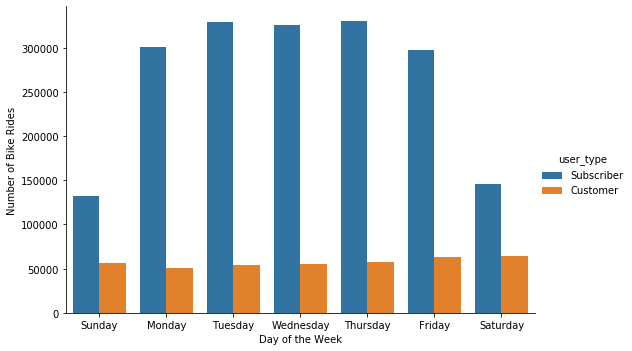

In [176]:
sns.catplot(x='day_of_week', data=gobike_2019_cln, height=5, 
            aspect=1.5, kind='count', hue='user_type')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Bike Rides')
plt.show()

The same distribution as in 2018. 

### Month: 

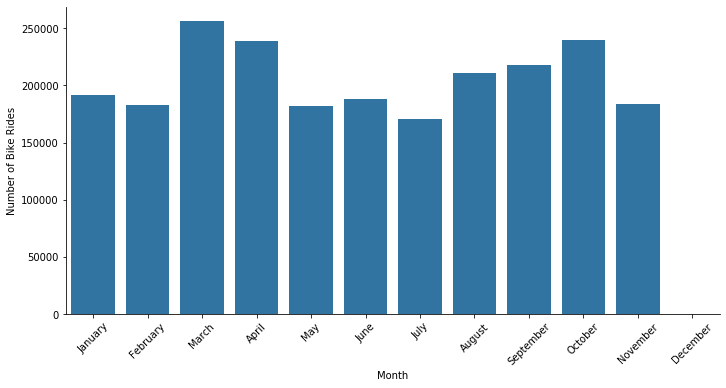

In [177]:
sns.catplot(x='month', data=gobike_2019_cln, height=5, 
            aspect=2, kind='count', color = base_color)
plt.xticks(rotation=45)
plt.xlabel('Month')
plt.ylabel('Number of Bike Rides')
plt.show()

We can see that out database is missing the month of December. Actually the records of December are the one missing the share bike status. 

The obtained results are quite curious. The peak around the summer duration disappeared. The distribution is now quite stable with small rises around March, April and October. 

I wonder what decision they made, that resulted in such best equilibrium between the month usages. It is a best price? during the low months? 

### Type of User vs Month

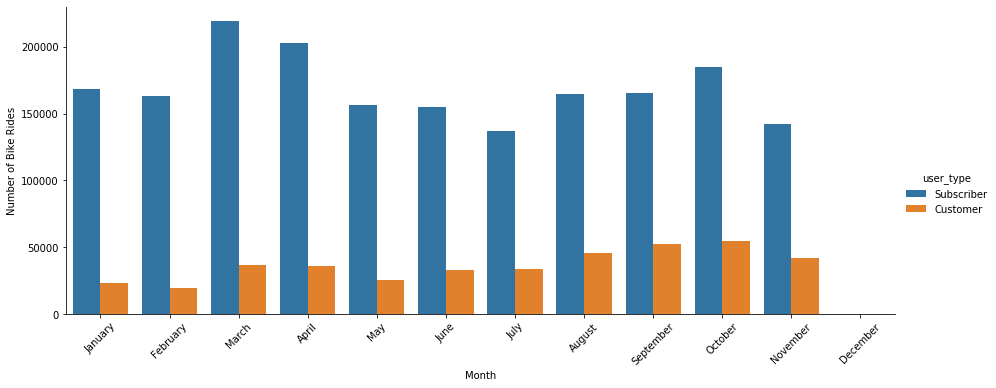

In [178]:
sns.catplot(x='month', hue = 'user_type', data=gobike_2019_cln, height=5, 
            aspect=2.5, kind='count')
plt.xticks(rotation=45)
plt.xlabel('Month')
plt.ylabel('Number of Bike Rides')
plt.show()

Even the distribution of occational users have changed and the peak is no longer during summer. 

However, we can see that the subscribers usage is having a bimodal shape with peaks around March and October. 

### Top 10 Departure Stations.

In [179]:
departure_stat = gobike_2019_cln.groupby('start_station_id')['start_time'].count().sort_values()

In [180]:
names_2019 = []
for elt in departure_stat.index[-10:]:
    names_2019.append(stations_2019[stations_2019['station_id']==elt]['station_name'].values[0])

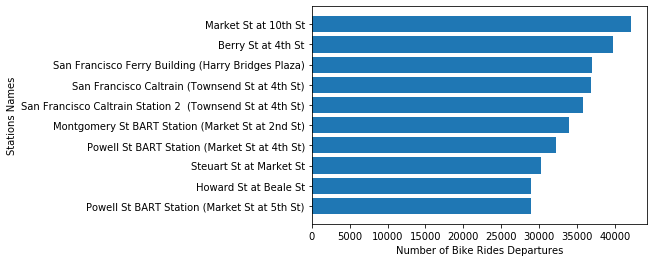

In [181]:
fig, ax = plt.subplots()
ax.barh(range(0,10), departure_stat.values[-10:])
ax.set_yticks(range(0,10))
ax.set_yticklabels(names_2019)
plt.ylabel('Stations Names')
plt.xlabel('Number of Bike Rides Departures')
plt.show()

The top 10 stations names are the same as in 2018. The order between them has changed. 

### Worst 10 Departure stations: 

In [182]:
w_names_2019 = []
for elt in departure_stat.index[:10]:
    w_names_2019.append(stations_2019[stations_2019['station_id']==elt]['station_name'].values[0])

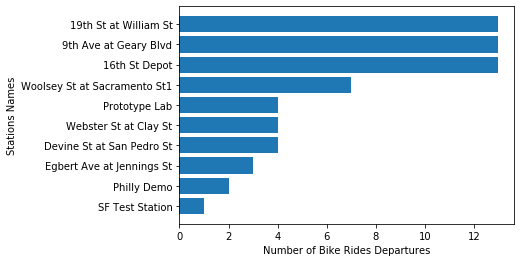

In [183]:
fig, ax = plt.subplots()
ax.barh(range(0,10), departure_stat.values[:10])
ax.set_yticks(range(0,10))
ax.set_yticklabels(w_names_2019)
plt.ylabel('Stations Names')
plt.xlabel('Number of Bike Rides Departures')
plt.show()

We have a lot of stations that do not serve as a start point except rarely. I'm wondering if these stations are not costing the company more money than they potentially bring.

### Conclusion:

We can see that clearly something has changed between 2018 and 2019. The number of rides has increased and even the distribution of these rides has changes. The difference betweet the months of summer and springs and the months of automn and winter is drastically reduced. Maybe the increase of the number of stations has something to do with these observations. However, the placement of new stations should be more studied otherwise the company risks of adding station that won't be profitable. In other words, there will be more insignificant stations that do not serve a lot as a starting point. 